# Real Estate Market Analysis with Python Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

import datetime
import requests
import json
import warnings

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Load datasets
customers = pd.read_csv('/Users/skye/Downloads/customers.csv', index_col = 0)
properties = pd.read_csv('/Users/skye/Downloads/properties.csv', index_col = 0)

## Inspect datasets

In [2]:
# data types for properties.csv
properties.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [3]:
print(properties.info())
print(properties.head())
print(properties.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ﻿id         267 non-null    int64  
 1   building    267 non-null    int64  
 2   date_sale   267 non-null    object 
 3   type        267 non-null    object 
 4   property#   267 non-null    int64  
 5   area        267 non-null    float64
 6   price       267 non-null    object 
 7   status      267 non-null    object 
 8   customerid  195 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 20.9+ KB
None
    ﻿id  building  date_sale       type  property#     area         price  \
0  1030         1  11/1/2005  Apartment         30   743.09  $246,172.68    
1  1029         1  10/1/2005  Apartment         29   756.21  $246,331.90    
2  2002         2   7/1/2007  Apartment          2   587.28  $209,280.91    
3  2031         2  12/1/2007  Apartment         31  1604.75  $452,667.01  

In [4]:
# data types for customers.csv
customers.dtypes

﻿customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [5]:
print(customers.info())
print(customers.head())
print(customers.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 0 to 161
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ﻿customerid        162 non-null    object
 1   entity             162 non-null    object
 2   name               162 non-null    object
 3   surname            162 non-null    object
 4   birth_date         155 non-null    object
 5   sex                155 non-null    object
 6   country            162 non-null    object
 7   state              154 non-null    object
 8   purpose            162 non-null    object
 9   deal_satisfaction  162 non-null    int64 
 10  mortgage           162 non-null    object
 11  source             162 non-null    object
dtypes: int64(1), object(11)
memory usage: 16.5+ KB
None
  ﻿customerid      entity     name  surname  birth_date  sex country  \
0       C0110  Individual   Kareem      Liu   5/11/1968    F     USA   
1       C0010  Individual  Trystan  Oconn

## Data Cleaning and Preprocessing

### for Properties

In [6]:
properties_1 = properties.copy()

In [7]:
properties_1.describe(include='all')

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


In [8]:
properties_1.head()

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [9]:
properties_1.dtypes

﻿id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [10]:
properties_1.columns.array

<NumpyExtensionArray>
[  '\ufeffid',   'building',  'date_sale',       'type',  'property#',
       'area',      'price',     'status', 'customerid']
Length: 9, dtype: object

In [11]:
# rename column \ufeffid to property_id
properties_1 = properties_1.rename(columns = {'\ufeffid': 'property_id'})

In [12]:
# change the id type into a string 
properties_1['property_id'] = properties_1['property_id'].astype(str)

# change the building and property# type into a string
properties_1['building'] = properties_1['building'].astype(str)
properties_1['property#'] = properties_1['property#'].astype(str)

In [13]:
# examine the type
properties_1.dtypes

property_id     object
building        object
date_sale       object
type            object
property#       object
area           float64
price           object
status          object
customerid      object
dtype: object

In [14]:
properties_1.head()

,property_id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [15]:
# Retrieve and display the unique values from the 'date_sale' column 
# in the 'properties' DataFrame. Useful for understanding the range of dates.
properties_1['date_sale'].unique()

array(['11/1/2005', '10/1/2005', '7/1/2007', '12/1/2007', '11/1/2004',
       '9/1/2007', '1/1/2008', '6/1/2006', '3/1/2006', '10/1/2004',
       '8/1/2006', '10/1/2007', '11/1/2006', '4/1/2007', '10/1/2006',
       '12/1/2006', '3/1/2005', '3/1/2007', '9/1/2006', '1/1/2007',
       '5/1/2007', '7/1/2006', '5/1/2008', '11/1/2007', '1/1/2005',
       '8/1/2007', '6/1/2005', '2/1/2007', '6/1/2007', '2/1/2005',
       '8/1/2004', '12/1/2008', '5/1/2010', '4/1/2006', '8/1/2005',
       '6/1/2004', '12/1/2005', '3/1/2004', '2/1/2006', '4/1/2005',
       '5/1/2006', '#NUM!', '9/1/2005', '7/1/2005'], dtype=object)

In [16]:
# Replace instances of '#NUM!' in the 'date_sale' column with pandas' Not Available (NA) value.
properties_1['date_sale'] = properties_1['date_sale'].replace('#NUM!', pd.NA)

In [17]:
# Display the unique values in the 'date_sale' column after replacement to verify the change.
# The output will show '<NA>' in place of '#NUM!' entries.
print(properties_1['date_sale'].unique())

['11/1/2005' '10/1/2005' '7/1/2007' '12/1/2007' '11/1/2004' '9/1/2007'
 '1/1/2008' '6/1/2006' '3/1/2006' '10/1/2004' '8/1/2006' '10/1/2007'
 '11/1/2006' '4/1/2007' '10/1/2006' '12/1/2006' '3/1/2005' '3/1/2007'
 '9/1/2006' '1/1/2007' '5/1/2007' '7/1/2006' '5/1/2008' '11/1/2007'
 '1/1/2005' '8/1/2007' '6/1/2005' '2/1/2007' '6/1/2007' '2/1/2005'
 '8/1/2004' '12/1/2008' '5/1/2010' '4/1/2006' '8/1/2005' '6/1/2004'
 '12/1/2005' '3/1/2004' '2/1/2006' '4/1/2005' '5/1/2006' <NA> '9/1/2005'
 '7/1/2005']


In [18]:
# Convert the 'date_sale' column to datetime format for proper handling of dates.
properties_1['date_sale'] = pd.to_datetime(properties_1['date_sale'])

# Display the unique values in the 'date_sale' column after conversion.
# This step ensures all entries are either valid datetime objects or NaT (Not a Time) for missing values.
print(properties_1['date_sale'].unique())


<DatetimeArray>
['2005-11-01 00:00:00', '2005-10-01 00:00:00', '2007-07-01 00:00:00',
 '2007-12-01 00:00:00', '2004-11-01 00:00:00', '2007-09-01 00:00:00',
 '2008-01-01 00:00:00', '2006-06-01 00:00:00', '2006-03-01 00:00:00',
 '2004-10-01 00:00:00', '2006-08-01 00:00:00', '2007-10-01 00:00:00',
 '2006-11-01 00:00:00', '2007-04-01 00:00:00', '2006-10-01 00:00:00',
 '2006-12-01 00:00:00', '2005-03-01 00:00:00', '2007-03-01 00:00:00',
 '2006-09-01 00:00:00', '2007-01-01 00:00:00', '2007-05-01 00:00:00',
 '2006-07-01 00:00:00', '2008-05-01 00:00:00', '2007-11-01 00:00:00',
 '2005-01-01 00:00:00', '2007-08-01 00:00:00', '2005-06-01 00:00:00',
 '2007-02-01 00:00:00', '2007-06-01 00:00:00', '2005-02-01 00:00:00',
 '2004-08-01 00:00:00', '2008-12-01 00:00:00', '2010-05-01 00:00:00',
 '2006-04-01 00:00:00', '2005-08-01 00:00:00', '2004-06-01 00:00:00',
 '2005-12-01 00:00:00', '2004-03-01 00:00:00', '2006-02-01 00:00:00',
 '2005-04-01 00:00:00', '2006-05-01 00:00:00',                 'NaT',
 '20

In [19]:
# Generate descriptive statistics summary for all columns, including numerical and non-numerical.
properties_1.describe(include='all')

,property_id,building,date_sale,type,property#,area,price,status,customerid
count,267,267,195,267,267,267.000000,267,267,195
unique,240,5,NaN,2,59,NaN,266,2,162
top,5041,3,NaN,Apartment,34,NaN,"$460,001.26",Sold,C0174
freq,2,63,NaN,259,7,NaN,2,195,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,NaN,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,NaN,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,NaN,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,NaN,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,NaN,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,NaN,NaN,NaN


In [20]:
# Check unique values in the 'type' column.
print(properties_1['type'].unique())  

['Apartment' 'Office']


In [21]:
# Convert all values in the 'type' column to lowercase for consistency.
properties_1['type'] = properties_1['type'].str.lower()
print(properties_1['type'].unique())  

['apartment' 'office']


In [22]:
# Display the first rows of the DataFrame to check the changes.
print(properties_1.head())

# Check data types of all columns.
print(properties_1.dtypes)

  property_id building  date_sale       type property#     area         price  \
0        1030        1 2005-11-01  apartment        30   743.09  $246,172.68    
1        1029        1 2005-10-01  apartment        29   756.21  $246,331.90    
2        2002        2 2007-07-01  apartment         2   587.28  $209,280.91    
3        2031        2 2007-12-01  apartment        31  1604.75  $452,667.01    
4        1049        1 2004-11-01  apartment        49  1375.45  $467,083.31    

   status customerid  
0   Sold      C0028   
1   Sold      C0027   
2   Sold      C0112   
3   Sold      C0160   
4   Sold      C0014   
property_id            object
building               object
date_sale      datetime64[ns]
type                   object
property#              object
area                  float64
price                  object
status                 object
customerid             object
dtype: object


In [23]:
# Create a new column 'price$' without the '$' symbol.
properties_1['price$'] = properties_1['price'].str.strip('$')

In [24]:
# Rename 'customerid' column in properties_1 to 'customer_id' to match customers_1
properties_1.rename(columns={'customerid': 'customer_id'}, inplace=True)

In [25]:
# Display the first rows to verify the new column.
print(properties_1.head())

  property_id building  date_sale       type property#     area         price  \
0        1030        1 2005-11-01  apartment        30   743.09  $246,172.68    
1        1029        1 2005-10-01  apartment        29   756.21  $246,331.90    
2        2002        2 2007-07-01  apartment         2   587.28  $209,280.91    
3        2031        2 2007-12-01  apartment        31  1604.75  $452,667.01    
4        1049        1 2004-11-01  apartment        49  1375.45  $467,083.31    

   status customer_id       price$  
0   Sold       C0028   246,172.68   
1   Sold       C0027   246,331.90   
2   Sold       C0112   209,280.91   
3   Sold       C0160   452,667.01   
4   Sold       C0014   467,083.31   


In [26]:
# Remove commas from the 'price$' column and ensure the data is numeric.
properties_1['price$'] = properties_1['price$'].replace(',', '', regex=True).astype(float)

# Drop the original 'price' column as it's no longer needed.
properties_1 = properties_1.drop(columns=['price'])

# Check the result after dropping the column.
print(properties_1.head())  

  property_id building  date_sale       type property#     area  status  \
0        1030        1 2005-11-01  apartment        30   743.09   Sold    
1        1029        1 2005-10-01  apartment        29   756.21   Sold    
2        2002        2 2007-07-01  apartment         2   587.28   Sold    
3        2031        2 2007-12-01  apartment        31  1604.75   Sold    
4        1049        1 2004-11-01  apartment        49  1375.45   Sold    

  customer_id     price$  
0      C0028   246172.68  
1      C0027   246331.90  
2      C0112   209280.91  
3      C0160   452667.01  
4      C0014   467083.31  


In [27]:
# Verify updated data types of all columns.
print(properties_1.dtypes)

# Check unique values in the 'status' column.
print(properties_1['status'].unique())  

property_id            object
building               object
date_sale      datetime64[ns]
type                   object
property#              object
area                  float64
status                 object
customer_id            object
price$                float64
dtype: object
[' Sold ' '-']


In [28]:
# Remove leading and trailing whitespaces from the 'status' column.
properties_1['status'] = properties_1['status'].str.strip()

# Convert all values in the 'status' column to lowercase for consistency.
properties_1['status'] = properties_1['status'].str.lower()

# Print the unique values in the 'status' column.
print(properties_1['status'].unique()) 

['sold' '-']


In [29]:
# Rename the 'status' column to 'sold'.
properties_1 = properties_1.rename(columns={'status': 'sold'})

# Convert the 'sold' column to boolean: 1 for 'sold', 0 for not sold ('-').
properties_1['sold'] = properties_1['sold'].map({'sold': 1, '-': 0})
print(properties_1['sold'].unique())  

[1 0]


In [30]:
# Verify updated data types again after modifications.
print(properties_1.dtypes)

property_id            object
building               object
date_sale      datetime64[ns]
type                   object
property#              object
area                  float64
sold                    int64
customer_id            object
price$                float64
dtype: object


In [31]:
# Check for missing values in the DataFrame.
print(properties_1.isnull().sum())

property_id     0
building        0
date_sale      72
type            0
property#       0
area            0
sold            0
customer_id    72
price$          0
dtype: int64


In [32]:
# Check if missing values in `date_sale` and `customerid` align with unsold properties
print(properties_1[properties_1['sold'] == 0][['date_sale', 'customer_id']].isnull().sum())

date_sale      72
customer_id    72
dtype: int64


In [33]:
properties_1.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31


In [34]:
# Create a flag for missing `date_sale` values (True if `date_sale` is missing, False otherwise)
properties_1['date_sale_missing'] = properties_1['date_sale'].isnull()

# Create a flag for missing `customerid` values (True if `customerid` is missing, False otherwise)
properties_1['customerid_missing'] = properties_1['customer_id'].isnull()

# Map the `sold` column to a more descriptive `sale_status` column
# 1 -> 'Sold', 0 -> 'Unsold'
properties_1['sale_status'] = properties_1['sold'].map({1: 'Sold', 0: 'Unsold'})

# Display the first few rows of the modified DataFrame to confirm changes
properties_1.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,customerid_missing,sale_status
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,False,Sold
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,False,Sold
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,False,Sold
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,False,Sold
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,False,Sold


### for Customers

In [35]:
# Create a copy of the original customers DataFrame for modifications
customers_1 = customers.copy()

In [36]:
# Get a summary of all columns in the DataFrame, including categorical data
customers_1.describe(include='all')

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [37]:
# Check the column names of the dataset, including any potential anomalies
customers_1.columns.array

<NumpyExtensionArray>
[ '\ufeffcustomerid',            'entity',              'name',
           'surname',        'birth_date',               'sex',
           'country',             'state',           'purpose',
 'deal_satisfaction',          'mortgage',            'source']
Length: 12, dtype: object

In [38]:
# Rename the column '\ufeffcustomerid' to 'customer_id' for consistency
customers_1 = customers_1.rename(columns={'\ufeffcustomerid': 'customer_id'})

# Verify the changes and describe the original dataset for comparison
customers_1.describe(include='all')


,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Jack,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


In [39]:
# Display data types of all columns in the customers DataFrame
print(customers_1.dtypes)

customer_id          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object


In [40]:
# Check for missing values in the customers_1 dataset
customers_1.isna().sum()

customer_id          0
entity               0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [41]:
# Confirm the first few rows of the dataset to examine its structure and detect irregularities
customers_1.head()

,customer_id,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [42]:
# Rename the 'entity' column to 'individual' for clarity
customers_1 = customers_1.rename(columns={'entity': 'individual'})

# Display the first few rows to verify the column name change
customers_1.head()

,customer_id,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [43]:
# Convert the 'individual' column into a boolean:
# 'Individual' = 1, 'Company' = 0
customers_1['individual'] = customers_1['individual'].map({'Individual': 1, 'Company': 0})

# Check unique values of the 'individual' column
customers_1['individual'].unique()

array([1, 0])

In [44]:
# Convert 'sex' column: F = 1, M = 0, and replace NaN with pd.NA
customers_1['sex'] = customers_1['sex'].map({'F': '1', 'M': '0'}).fillna(pd.NA)

# Check unique values of the 'sex' column after conversion
customers_1['sex'].unique()

array(['1', '0', <NA>], dtype=object)

In [45]:
# Check for remaining missing values
customers_1.isna().sum()

customer_id          0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [46]:
# Print unique values of the 'source' column
print(customers_1['source'].unique())

# Print unique values of the 'purpose' column
print(customers_1['purpose'].unique())

['Website' 'Agency' 'Client']
['Home' 'Investment']


In [47]:
# Convert 'source' and 'purpose' columns to lowercase
customers_1['source'] = customers_1['source'].str.lower()
customers_1['purpose'] = customers_1['purpose'].str.lower()

# Display the first few rows after transformations
customers_1.head()

,customer_id,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,Yes,website
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,No,website
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,Yes,agency
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,No,website
4,C0174,0,Marleez,Co,NaN,<NA>,USA,California,investment,5,No,website


In [48]:
# Check unique values of the 'mortgage' column
customers_1['mortgage'].unique()

# Map 'mortgage' values: Yes = 1, No = 0
customers_1['mortgage'] = customers_1['mortgage'].map({'Yes': 1, 'No': 0})

# Check unique values of the 'mortgage' column after mapping
customers_1['mortgage'].unique()

array([1, 0])

In [49]:
# Check for missing values after the transformations
customers_1.isna().sum()

customer_id          0
individual           0
name                 0
surname              0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
dtype: int64

In [50]:
# Create a new column called 'full_name' by concatenating 'name' and 'surname'
customers_1['full_name'] = customers_1['name'] + ' ' + customers_1['surname']

# Display the first few rows to confirm the 'full_name' column was created
customers_1.head()

,customer_id,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,Kareem,Liu,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,Trystan,Oconnor,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,Kale,Gay,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,Russell,Gross,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,Marleez,Co,NaN,<NA>,USA,California,investment,5,0,website,Marleez Co


In [51]:
# Drop the 'name' and 'surname' columns as they are no longer needed
customers_1 = customers_1.drop(columns=['name', 'surname'])

# Display the first few rows after dropping columns to verify changes
customers_1.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,11/26/1962,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,4/7/1959,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,11/25/1959,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaN,<NA>,USA,California,investment,5,0,website,Marleez Co


In [52]:
# Convert 'birth_date' from object to datetime format
customers_1['birth_date'] = pd.to_datetime(customers_1['birth_date'])

# Check data types again to confirm the conversion
customers_1.dtypes

customer_id                  object
individual                    int64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                      int64
source                       object
full_name                    object
dtype: object

In [53]:
# Check for missing values 
customers_1.isna().sum()  

customer_id          0
individual           0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

### Merged Data of the two datasets customers_1 and properties_1

In [54]:
# Display the first few rows of properties_1 to inspect the dataset
properties_1.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,customerid_missing,sale_status
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,False,Sold
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,False,Sold
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,False,Sold
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,False,Sold
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,False,Sold


In [55]:
# Display the first few rows of customers_1 to inspect the dataset
customers_1.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,<NA>,USA,California,investment,5,0,website,Marleez Co


In [56]:
# unique id
properties_1.customer_id.unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [57]:
# unique id
customers_1.customer_id.unique()

array(['C0110', 'C0010', 'C0132', 'C0137', 'C0174', 'C0088', 'C0079',
       'C0149', 'C0064', 'C0068', 'C0006', 'C0055', 'C0016', 'C0121',
       'C0074', 'C0032', 'C0093', 'C0076', 'C0165', 'C0153', 'C0129',
       'C0162', 'C0071', 'C0069', 'C0005', 'C0144', 'C0020', 'C0101',
       'C0128', 'C0033', 'C0171', 'C0095', 'C0123', 'C0015', 'C0084',
       'C0019', 'C0053', 'C0080', 'C0070', 'C0051', 'C0022', 'C0127',
       'C0081', 'C0104', 'C0073', 'C0168', 'C0169', 'C0039', 'C0086',
       'C0036', 'C0045', 'C0105', 'C0119', 'C0012', 'C0065', 'C0054',
       'C0172', 'C0029', 'C0098', 'C0142', 'C0135', 'C0037', 'C0134',
       'C0091', 'C0018', 'C0085', 'C0061', 'C0066', 'C0156', 'C0043',
       'C0112', 'C0145', 'C0047', 'C0082', 'C0007', 'C0052', 'C0041',
       'C0004', 'C0118', 'C0030', 'C0154', 'C0125', 'C0115', 'C0078',
       'C0151', 'C0111', 'C0014', 'C0103', 'C0024', 'C0166', 'C0067',
       'C0122', 'C0107', 'C0003', 'C0099', 'C0160', 'C0013', 'C0059',
       'C0120', 'C01

In [58]:
# Clean the 'customerid' columns by stripping whitespaces
customers_1['customer_id'] = customers_1['customer_id'].str.strip()
properties_1['customer_id'] = properties_1['customer_id'].str.strip()

In [59]:
properties_1['customer_id'] = np.where(properties_1['customer_id']=='', pd.NA, properties_1['customer_id'])

In [60]:
# Merge the datasets on 'customer_id', with a left join to keep all rows from properties_1
merged_data = pd.merge(properties_1, customers_1, on='customer_id', how='left')

In [61]:
# Display the first few rows of the merged data
merged_data.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,...,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,...,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,...,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,...,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,...,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [62]:
# Display the last few rows of the merged data
merged_data.tail()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,NaT,apartment,44,1238.58,0,NaN,322610.74,True,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,0,NaN,279191.26,True,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,0,NaN,287996.53,True,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,0,NaN,365868.78,True,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,0,NaN,199216.40,True,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# Here's the total count of entries in the customers dataframe.
customers_1.count()

customer_id          162
individual           162
birth_date           155
sex                  155
country              162
state                154
purpose              162
deal_satisfaction    162
mortgage             162
source               162
full_name            162
dtype: int64

In [64]:
# The count of unique entries in the 'customerid' column of the properties dataframe.
properties['customerid'].nunique()

162

In [65]:
merged_data.dtypes

property_id                   object
building                      object
date_sale             datetime64[ns]
type                          object
property#                     object
area                         float64
sold                           int64
customer_id                   object
price$                       float64
date_sale_missing               bool
customerid_missing              bool
sale_status                   object
individual                   float64
birth_date            datetime64[ns]
sex                           object
country                       object
state                         object
purpose                       object
deal_satisfaction            float64
mortgage                     float64
source                        object
full_name                     object
dtype: object

In [66]:
# For the NaN values in our dataset, it would be beneficial to replace them.
merged_data.fillna(pd.NA)

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,...,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,...,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,...,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,...,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,...,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,0,<NA>,322610.74,True,...,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
263,5047,5,NaT,apartment,47,794.52,0,<NA>,279191.26,True,...,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
264,5048,5,NaT,apartment,48,1013.27,0,<NA>,287996.53,True,...,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>
265,5050,5,NaT,apartment,50,1074.71,0,<NA>,365868.78,True,...,NaN,NaT,<NA>,<NA>,<NA>,<NA>,NaN,NaN,<NA>,<NA>


### Test Q?A for Statistics

In [67]:
real_estate_data = merged_data.copy()

In [68]:
# Let's inspect the first few rows of our processed data.
real_estate_data.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,...,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,...,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,...,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,...,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,...,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [69]:
# Descriptive statistics.
real_estate_data.describe()

,date_sale,area,sold,price$,individual,birth_date,deal_satisfaction,mortgage
count,195,267.000000,267.000000,267.000000,195.000000,178,195.000000,195.000000
mean,2006-11-08 14:38:46.153846272,936.221311,0.730337,281171.901386,0.912821,1961-01-08 11:35:43.820224704,3.600000,0.317949
min,2004-03-01 00:00:00,410.710000,0.000000,117564.070000,0.000000,1931-02-13 00:00:00,1.000000,0.000000
25%,2006-04-16 00:00:00,756.210000,0.000000,217553.055000,1.000000,1951-05-04 06:00:00,3.000000,0.000000
50%,2007-03-01 00:00:00,798.280000,1.000000,249075.660000,1.000000,1962-09-23 00:00:00,4.000000,0.000000
75%,2007-09-01 00:00:00,1121.950000,1.000000,326964.855000,1.000000,1970-07-09 06:00:00,5.000000,1.000000
max,2010-05-01 00:00:00,1942.500000,1.000000,538271.740000,1.000000,1986-06-21 00:00:00,5.000000,1.000000
std,NaN,284.894858,0.444618,89119.121005,0.282824,NaN,1.340872,0.466878


In [70]:
# Comprehensive set of descriptive statistics.
real_estate_data.describe(include="all")

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,195,267.000000,267,...,195.000000,178,178,195,181,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,162,NaN,2,...,NaN,NaN,2,9,9,2,NaN,NaN,3,162
top,5041,3,NaN,apartment,34,NaN,NaN,C0174,NaN,False,...,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,9,NaN,195,...,NaN,NaN,108,165,120,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,0.730337,NaN,281171.901386,NaN,...,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,0.000000,NaN,117564.070000,NaN,...,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,0.000000,NaN,217553.055000,NaN,...,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,1.000000,NaN,249075.660000,NaN,...,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,1.000000,NaN,326964.855000,NaN,...,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,1.000000,NaN,538271.740000,NaN,...,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


In [71]:
# Let's identify the unique buildings in our dataset.
real_estate_data['building'].unique()

array(['1', '2', '3', '4', '5'], dtype=object)

In [72]:
# Grouping by 'building' and summing numeric columns
grouped_data = real_estate_data.groupby('building').sum(numeric_only=True)

# Display the result
grouped_data

,area,sold,price$,date_sale_missing,customerid_missing,individual,deal_satisfaction,mortgage
building,,,,,,,,
1,48258.02,46,14307448.61,6,6,31.0,167.0,14.0
2,53801.84,54,16339725.35,3,3,52.0,190.0,18.0
3,58454.70,53,17668429.10,10,10,53.0,189.0,15.0
4,41913.00,23,12480299.17,20,20,23.0,89.0,9.0
5,47543.53,19,14276995.44,33,33,19.0,67.0,6.0


In [73]:
# Grouping the data by 'building' and count of entries for each building.
real_estate_data.groupby('building')
real_estate_data.groupby('building').size()

building
1    52
2    57
3    63
4    43
5    52
dtype: int64

In [74]:
# To find totals by building Let's commence with deriving total counts per building.
columns_of_interest = ['building', 'sold','mortgage']

# Now we will create a new variable to hold the total counts grouped by building.
totals_by_building = real_estate_data[columns_of_interest].groupby("building").sum()
totals_by_building 

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


In [75]:
# Calculate averages by building¶
# List of columns of interest for average calculation
columns_for_averages = ['building', 'area', 'price$', 'deal_satisfaction']

# Calculate average values grouped by building
averages_by_building = real_estate_data[columns_for_averages].groupby("building").mean()

# Display the result
averages_by_building

,area,price$,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


In [76]:
# Total Sales and Mortgages by Country"

# Updated list of columns of interest for total calculation by country
columns_for_totals_by_country = ['country', 'sold', 'price$', 'mortgage']

# Calculate totals grouped by country
totals_by_country = real_estate_data[columns_for_totals_by_country].groupby("country").sum()

# Display the result
print(totals_by_country)


         sold       price$  mortgage
country                             
Belgium     2    458150.94       0.0
Canada      7   1918485.69       0.0
Denmark     1    257183.48       0.0
Germany     1    205098.21       0.0
Mexico      1    338181.18       0.0
Russia      4   1115315.34       1.0
UK          2    440285.36       0.0
USA       165  44666887.16      61.0
USA        12   3140152.02       0.0


### Data Cleaning: Removing Leading and Trailing Spaces from 'country' and Other Object Columns

In [77]:
# Remove leading and trailing spaces from the 'country' column
real_estate_data['country'] = real_estate_data['country'].str.strip()

# Print the unique values in the 'country' column again
print(real_estate_data['country'].unique())

['USA' 'UK' 'Belgium' 'Russia' 'Denmark' 'Germany' 'Mexico' 'Canada' nan]


In [78]:
# Select object columns in real_estate_data
object_columns = real_estate_data.select_dtypes(['object']).columns
object_columns

Index(['property_id', 'building', 'type', 'property#', 'customer_id',
       'sale_status', 'sex', 'country', 'state', 'purpose', 'source',
       'full_name'],
      dtype='object')

### Total Sale, prices and Mortgages by Country:

In [79]:
# Apply strip() to clean up leading/trailing spaces for all object columns
real_estate_data[object_columns] = real_estate_data[object_columns].apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Check for any leading/trailing spaces in 'country' column again after cleanup
print(real_estate_data['country'].unique())


['USA' 'UK' 'Belgium' 'Russia' 'Denmark' 'Germany' 'Mexico' 'Canada' nan]


In [80]:
# print totals_by_country
totals_by_country = real_estate_data[columns_for_totals_by_country].groupby("country").sum()
totals_by_country

,sold,price$,mortgage
country,,,
Belgium,2,458150.94,0.0
Canada,7,1918485.69,0.0
Denmark,1,257183.48,0.0
Germany,1,205098.21,0.0
Mexico,1,338181.18,0.0
Russia,4,1115315.34,1.0
UK,2,440285.36,0.0
USA,177,47807039.18,61.0


### Average Area, Deal Satisfaction, and Price by Country

In [81]:
# Define the columns of interest for average calculations
columns_of_interest = ['country', 'area', 'deal_satisfaction', 'price$']

# Group by 'country' and compute the mean of the specified columns
averages_by_country = real_estate_data[columns_of_interest].groupby("country").mean()

# Display the result
averages_by_country

,area,deal_satisfaction,price$
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


### Totals by State: Summing 'sold' and 'mortgage' values after handling missing 'state' entries

In [82]:
# Define the columns of interest for totals by state
columns_of_interest = ['state', 'sold', 'mortgage']

# First, handle missing values in 'state' column (map empty strings to NA, and set state to NA for non-USA countries)
real_estate_data['state'] = np.where(real_estate_data['state'] == '', pd.NA, real_estate_data['state'])
real_estate_data['state'] = np.where(real_estate_data['country'] != 'USA', pd.NA, real_estate_data['state'])

# Now, group by 'state' and calculate the sum for the specified columns
totals_by_state = real_estate_data[columns_of_interest].groupby("state").sum()

# Display the sum of sold properties and mortgage totals
print("Total sold properties:", totals_by_state['sold'].sum())
print(totals_by_state)


Total sold properties: 177
            sold  mortgage
state                     
Arizona        9       3.0
California   118      41.0
Colorado      11       5.0
Kansas         1       0.0
Nevada        17       8.0
Oregon        11       1.0
Utah           5       1.0
Virginia       4       2.0
Wyoming        1       0.0


### Sales Frequency by State

In [83]:
# Define the columns of interest for frequency calculation
columns_of_interest = ['state', 'sold']

# Group by 'state' and calculate the sum of sales
sold_by_state = real_estate_data[columns_of_interest].groupby("state").sum()

# Sort the data by sales ('sold') in descending order for better readability
sold_by_state = sold_by_state.sort_values('sold', ascending=False)

# Rename the 'sold' column to 'frequency' for clarity
sold_by_state = sold_by_state.rename(columns={'sold': 'frequency'})

# Display the result
print(sold_by_state)


            frequency
state                
California        118
Nevada             17
Colorado           11
Oregon             11
Arizona             9
Utah                5
Virginia            4
Kansas              1
Wyoming             1


### Sales Frequency, Relative Frequency, and Cumulative Frequency by State

In [84]:
# Calculate the relative frequency by dividing each state's frequency by the total frequency
sold_by_state['relative_frequency'] = sold_by_state['frequency'] / sold_by_state['frequency'].sum()

# Compute the cumulative frequency using cumsum() on the relative frequency column
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()

# Display the result
print(sold_by_state)

            frequency  relative_frequency  cumulative_frequency
state                                                          
California        118            0.666667              0.666667
Nevada             17            0.096045              0.762712
Colorado           11            0.062147              0.824859
Oregon             11            0.062147              0.887006
Arizona             9            0.050847              0.937853
Utah                5            0.028249              0.966102
Virginia            4            0.022599              0.988701
Kansas              1            0.005650              0.994350
Wyoming             1            0.005650              1.000000


### Test Q?A for Data Analysis 

In [85]:
# 1. Display the first few rows of the real_estate_data
real_estate_data.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,...,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,...,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,...,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,...,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,...,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [86]:
# 2. Calculate Age at the Time of Purchase
real_estate_data['age_at_purchase'] = real_estate_data['date_sale'] - real_estate_data['birth_date']
real_estate_data['age_at_purchase'] = real_estate_data['age_at_purchase'].apply(lambda x: x.days)  # Convert to days
real_estate_data['age_at_purchase'] = real_estate_data['age_at_purchase'] / 365  # Convert days to years

In [87]:
# 3. Round the Age at Purchase
real_estate_data['age_at_purchase_rounded'] = real_estate_data['age_at_purchase'].apply(lambda x: np.floor(x))
real_estate_data['age_at_purchase_rounded']

0      19.0
1      22.0
2      21.0
3      21.0
4      25.0
       ... 
262     NaN
263     NaN
264     NaN
265     NaN
266     NaN
Name: age_at_purchase_rounded, Length: 267, dtype: float64

In [88]:
# 4. Create Age Intervals
real_estate_data['age_interval'] = pd.cut(real_estate_data['age_at_purchase'], bins=10, precision=0)
real_estate_data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 31.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 31.0] < (31.0, 36.0] < (36.0, 42.0] ... (54.0, 59.0] < (59.0, 65.0] < (65.0, 71.0] < (71.0, 76.0]]

In [89]:
# 5. Breakdown of Sales by Age Interval
columns_of_interest = ['age_interval', 'sold']
sold_by_age = real_estate_data[columns_of_interest].groupby("age_interval").sum()
sold_by_age

,sold
age_interval,
"(19.0, 25.0]",4
"(25.0, 31.0]",16
"(31.0, 36.0]",26
"(36.0, 42.0]",33
"(42.0, 48.0]",22
"(48.0, 54.0]",22
"(54.0, 59.0]",22
"(59.0, 65.0]",11
"(65.0, 71.0]",16


In [90]:
# 6. Create Price Intervals
real_estate_data['price_interval'] = pd.cut(real_estate_data['price$'], bins=10)
real_estate_data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

In [91]:
# 7. Total Number of Properties by Price Interval
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = real_estate_data[columns_of_interest].groupby("price_interval").count()
all_properties_by_price = all_properties_by_price.rename(columns={'sold': 'count'})
all_properties_by_price

,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


In [92]:
# 8. Total Number of Sold Properties by Price Interval
sold_properties_by_price = real_estate_data[columns_of_interest].groupby("price_interval").sum()
sold_properties_by_price

,sold
price_interval,
"(117143.362, 159634.837]",2
"(159634.837, 201705.604]",28
"(201705.604, 243776.371]",68
"(243776.371, 285847.138]",34
"(285847.138, 327917.905]",24
"(327917.905, 369988.672]",12
"(369988.672, 412059.439]",13
"(412059.439, 454130.206]",4
"(454130.206, 496200.973]",7


In [93]:
# 9. Calculate Number of Not Sold Properties
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - sold_properties_by_price['sold']
all_properties_by_price['sold'] = sold_properties_by_price['sold']
all_properties_by_price

,count,not_sold,sold
price_interval,,,
"(117143.362, 159634.837]",3,1,2
"(159634.837, 201705.604]",32,4,28
"(201705.604, 243776.371]",88,20,68
"(243776.371, 285847.138]",47,13,34
"(285847.138, 327917.905]",31,7,24
"(327917.905, 369988.672]",18,6,12
"(369988.672, 412059.439]",21,8,13
"(412059.439, 454130.206]",7,3,4
"(454130.206, 496200.973]",11,4,7


In [94]:
# 10. Filter Sold Apartments
data_sold = real_estate_data[real_estate_data['sold'] == 1]

In [95]:
# 11. Excluding Company Data, and Focusing on Individual Sales
data_sold = data_sold[data_sold['individual'] == 1]

In [96]:
# 12. Selecting Relevant Columns: Age at Purchase and Price
data_sold[['age_at_purchase', 'price$']]

,age_at_purchase,price$
0,19.378082,246172.68
1,22.616438,246331.90
2,21.523288,209280.91
3,21.942466,452667.01
4,25.484932,467083.31
...,...,...
173,70.846575,204292.49
174,72.849315,261579.89
175,73.038356,222867.42
176,72.778082,291494.36


In [97]:
# 13. Calculate Covariance of Age and Price
covariance = np.cov(data_sold['age_at_purchase'], data_sold['price$'])
print(covariance)

[[ 1.68344293e+02 -1.77726142e+05]
 [-1.77726142e+05  6.16619957e+09]]


In [98]:
# 14. Calculate Correlation of Age and Price
correlation = np.corrcoef(data_sold['age_at_purchase'], data_sold['price$'])
print(correlation)

[[ 1.         -0.17443889]
 [-0.17443889  1.        ]]


In [99]:
# 15. Clean Data by Removing Rows with Missing Values
data_sold_no_na = data_sold.dropna()

In [100]:
# 16. Calculate Correlation After Removing Missing Values
correlation_no_na = np.corrcoef(data_sold_no_na['age_at_purchase'], data_sold_no_na['price$'])
print(correlation_no_na)

[[ 1.         -0.19574621]
 [-0.19574621  1.        ]]


In [101]:
# 17. Calculate Correlation Using pandas (Alternative Approach)
pandas_corr = data_sold_no_na[['age_at_purchase', 'price$']].corr()
print(pandas_corr)

                 age_at_purchase    price$
age_at_purchase         1.000000 -0.195746
price$                 -0.195746  1.000000


In [102]:
# 18. Correlation of Age and Price Using Original Data with NA
corr_with_na = data_sold[['age_at_purchase', 'price$']].corr()
print(corr_with_na)

                 age_at_purchase    price$
age_at_purchase         1.000000 -0.174439
price$                 -0.174439  1.000000


In [103]:
# 19. Correlation of Age and Price in Full Dataset
full_data_corr = real_estate_data[['age_at_purchase', 'price$']].corr()
print(full_data_corr)

                 age_at_purchase    price$
age_at_purchase         1.000000 -0.174439
price$                 -0.174439  1.000000


In [104]:
# Performance by country
country_performance = real_estate_data.groupby('country').agg({
    'price$': ['mean', 'sum', 'min', 'max'],  # Adjust column name if needed
    'deal_satisfaction': 'mean',
    'area': 'mean'
}).reset_index()

# Performance by state
state_performance = real_estate_data.groupby('state').agg({
    'price$': ['mean', 'sum', 'min', 'max'],  # Adjust column name if needed
    'deal_satisfaction': 'mean',
    'area': 'mean'
}).reset_index()

# Display the results
print("\nPerformance by Country:")
print(country_performance)

print("\nPerformance by State:")
print(state_performance)



Performance by Country:
   country         price$                                     \
                     mean          sum        min        max   
0  Belgium  229075.470000    458150.94  215410.28  242740.66   
1   Canada  274069.384286   1918485.69  177555.06  484458.03   
2  Denmark  257183.480000    257183.48  257183.48  257183.48   
3  Germany  205098.210000    205098.21  205098.21  205098.21   
4   Mexico  338181.180000    338181.18  338181.18  338181.18   
5   Russia  278828.835000   1115315.34  248274.31  315733.15   
6       UK  220142.680000    440285.36  213942.56  226342.80   
7      USA  270096.266554  47807039.18  117564.07  529317.28   

  deal_satisfaction         area  
               mean         mean  
0          3.000000   852.730000  
1          5.000000   917.382857  
2          1.000000   785.480000  
3          5.000000   743.410000  
4          3.000000  1283.450000  
5          2.500000   903.757500  
6          4.000000   739.480000  
7          3.581921

### Test Q?A for Data Visualization 

#### Deal Satisfaction Across Countries (Bar Chart)


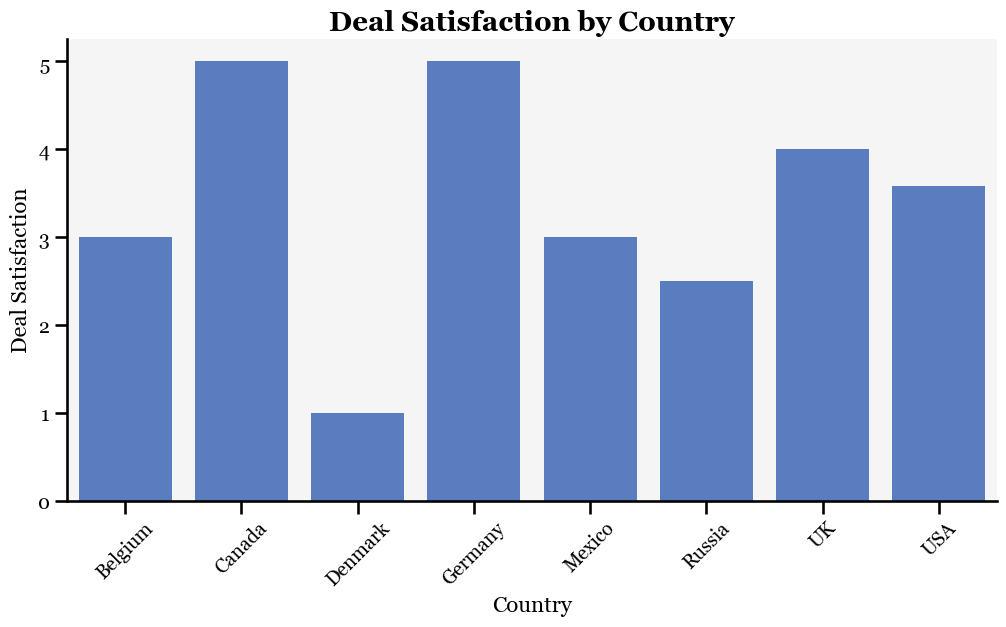

In [105]:
sns.set_palette("muted")  
sns.set_context("talk") 

# Create the figure
plt.figure(figsize=(12, 6))

# Bar plot with classy color and styling
sns.barplot(x=averages_by_country.index, y=averages_by_country['deal_satisfaction'])

# Style customizations for a more elegant look
plt.xticks(rotation=45, fontsize=14, family="Georgia", color="black")
plt.yticks(fontsize=14, family="Georgia", color="black")

# Set titles and labels with elegant fonts
plt.title("Deal Satisfaction by Country", fontsize=20, weight="bold", family="Georgia", color="black")
plt.xlabel("Country", fontsize=16, family="Georgia", color="black")
plt.ylabel("Deal Satisfaction", fontsize=16, family="Georgia", color="black")

# Apply a soft background color for the chart
plt.gca().set_facecolor("whitesmoke")

# Remove the top and right borders to maintain elegance
sns.despine()

# Save the figure
plt.savefig("deal_satisfaction_by_country_bar_chart.png", dpi=300)

# Show the plot
plt.show()


#### Customer Age Distribution (Histogram)


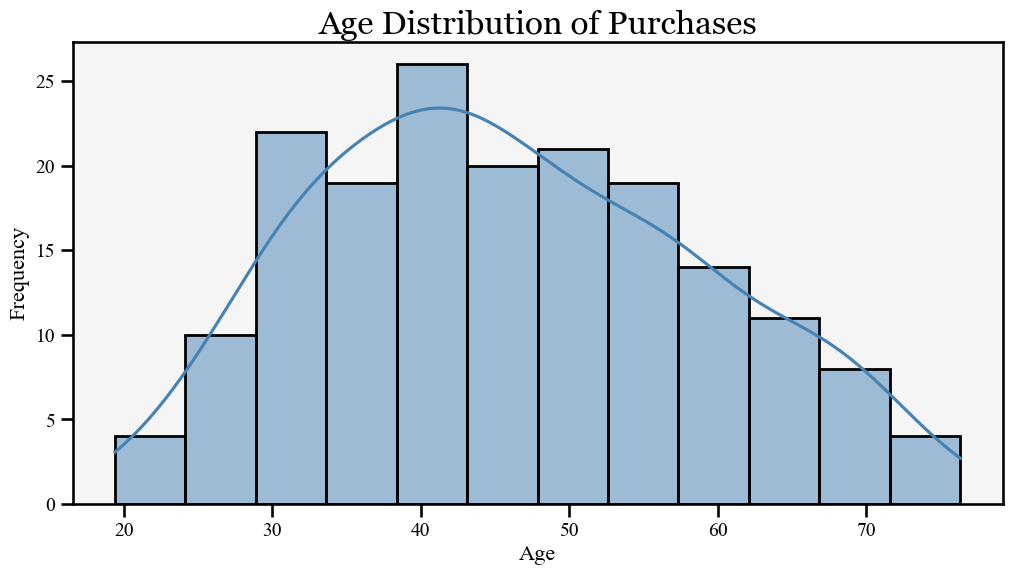

In [106]:
# Create the figure with a refined, minimalistic design
plt.figure(figsize=(12, 6))

# Elegant and smooth histogram with a soft accent color
sns.histplot(real_estate_data['age_at_purchase'], bins=12, kde=True, color="#4682B4", linewidth=2)

# Set title and labels with refined typography
plt.title("Age Distribution of Purchases", fontsize=24, family="Georgia", color="black")
plt.xlabel("Age", fontsize=16, family="Times New Roman", color="black")
plt.ylabel("Frequency", fontsize=16, family="Times New Roman", color="black")

# Soft background to make the chart pop
plt.gca().set_facecolor("whitesmoke")

# Adjust font size and style for axes
plt.xticks(fontsize=14, family="Times New Roman", color="black")
plt.yticks(fontsize=14, family="Times New Roman", color="black")

# Save and show with high quality
plt.savefig("age_distribution_elegant_histogram.png", dpi=300)
plt.show()


#### Pareto Diagram (Segmentation by State)

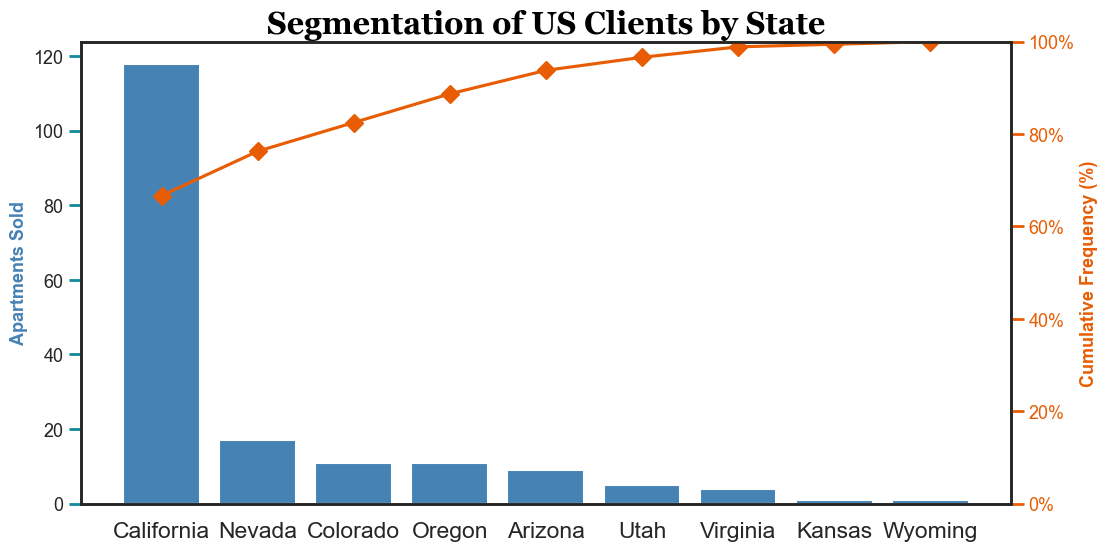

In [107]:
# Setting the seaborn style to "white" for aesthetic reasons
sns.set_style("white")

# Sort the data by frequency for Pareto (descending order)
sold_by_state_sorted = sold_by_state.sort_values(by='frequency', ascending=False)

# Calculate the cumulative frequency and convert it into a percentage
sold_by_state_sorted['cumulative_frequency_percent'] = (sold_by_state_sorted['frequency'].cumsum() / sold_by_state_sorted['frequency'].sum()) * 100

# Create the figure with two axes
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the bar chart for frequency
ax.bar(sold_by_state_sorted.index, sold_by_state_sorted['frequency'], color="#4682B4")
ax.set_ylabel("Apartments Sold", weight='bold', fontsize=13, color="#4682B4")
ax.tick_params(axis="y", width=2, labelsize=13, color="#108A99")

# Create a second y-axis for the cumulative frequency percentage
ax2 = ax.twinx()
ax2.plot(sold_by_state_sorted.index, sold_by_state_sorted['cumulative_frequency_percent'], color="#E85D04", marker="D")

# Set the y-axis limits and format the cumulative frequency as percentage
ax2.set_ylim(0, 100)
ax2.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))
ax2.set_ylabel("Cumulative Frequency (%)", color="#E85D04", weight="bold", fontsize=13)
ax2.tick_params(axis="y", colors="#E85D04", width=2, labelsize=13)

# Add title and labels
ax.set_title("Segmentation of US Clients by State", fontsize=22, weight="bold", family="Georgia", color="black")
# Save the figure
plt.savefig("US_segmentation_by_state_pareto_diagram.png")

# Show the plot
plt.show()


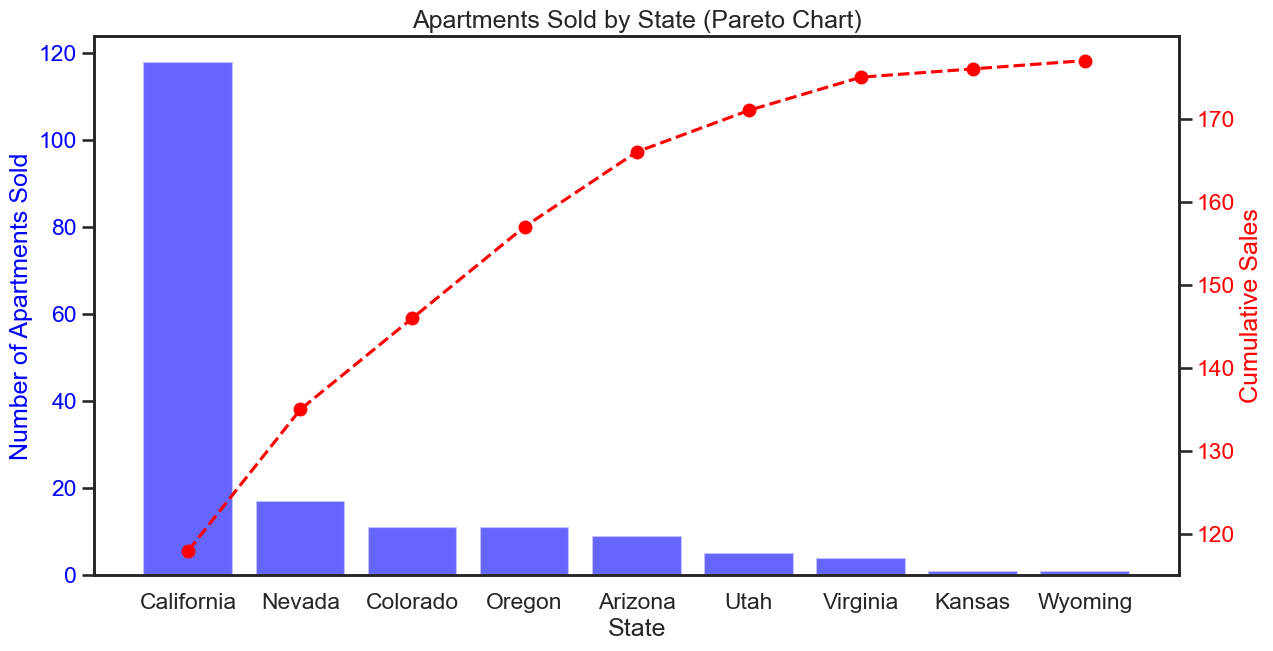

In [108]:
# Group by state and count the number of apartments sold (using 'price' or 'property#')
apartments_sold_by_state = real_estate_data.groupby('state')['price$'].count().sort_values(ascending=False)

# Calculate cumulative sales
cumulative_sales = apartments_sold_by_state.cumsum()

# Create the Pareto chart (bar and line)
fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for absolute frequency
ax1.bar(apartments_sold_by_state.index, apartments_sold_by_state.values, color='b', alpha=0.6)
ax1.set_xlabel('State')
ax1.set_ylabel('Number of Apartments Sold', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line chart for cumulative frequency
ax2 = ax1.twinx()
ax2.plot(apartments_sold_by_state.index, cumulative_sales, color='r', marker='o', linestyle='dashed')
ax2.set_ylabel('Cumulative Sales', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.title('Apartments Sold by State (Pareto Chart)')
plt.xticks(rotation=45)
plt.show()


### Line Chart: Total Revenue per Year


In [109]:
real_estate_data.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,state,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,...,California,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]"
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,...,California,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]"
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,...,California,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]"
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,...,California,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]"
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,...,California,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]"


In [110]:
# Extract year from the 'date_sale' column
real_estate_data['year_sale'] = real_estate_data['date_sale'].apply(lambda x: x.year)

# Handle missing values by replacing NaN with 0, converting to int, and restoring NaN values
real_estate_data['year_sale'] = real_estate_data['year_sale'].fillna(0).astype(int)
real_estate_data['year_sale'] = real_estate_data['year_sale'].replace({0: pd.NA})

# Summarize revenue per year
columns_of_interest = ['year_sale', 'price$']
revenue_per_year = real_estate_data[columns_of_interest].groupby('year_sale').sum()
revenue_per_year = revenue_per_year.rename(columns={'price$':'price_revenue$'})

In [111]:
revenue_per_year

,price_revenue$
year_sale,
2004,4397009.80
2005,7215232.41
2006,10906000.58
2007,27451798.34
2008,2212160.05
2010,357538.20


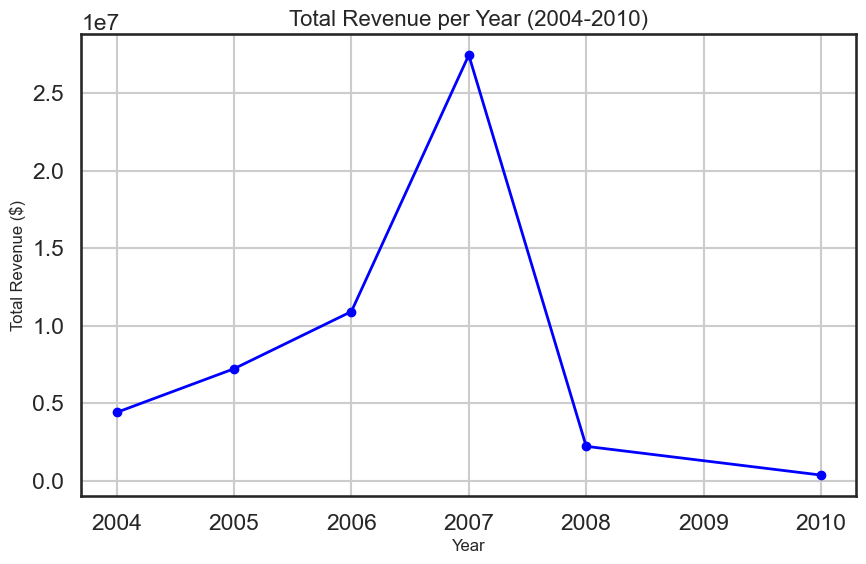

In [112]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(revenue_per_year.index, revenue_per_year['price_revenue$'], marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add titles and labels
plt.title('Total Revenue per Year (2004-2010)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()

In [113]:
# Calculate revenue in millions
revenue_per_year['revenue$inM'] = revenue_per_year['price_revenue$'] / 1000000

# Create a copy of the DataFrame
revenue_per_year_adj = revenue_per_year.copy()

# Add missing year (2009) with 0 revenue using pd.concat
missing_year = pd.DataFrame({'revenue$inM': [0]}, index=['2009'])
revenue_per_year_adj = pd.concat([revenue_per_year, missing_year])

# Convert the index to string type for consistency
revenue_per_year_adj.index = revenue_per_year_adj.index.astype(str)

# Reorder the DataFrame to ensure the years are in order
years_order = ['2004', '2005', '2006', '2007', '2008', '2009', '2010']
revenue_per_year_adj = revenue_per_year_adj.loc[years_order]

In [114]:
revenue_per_year_adj

,price_revenue$,revenue$inM
2004,4397009.80,4.397010
2005,7215232.41,7.215232
2006,10906000.58,10.906001
2007,27451798.34,27.451798
2008,2212160.05,2.212160
2009,NaN,0.000000
2010,357538.20,0.357538


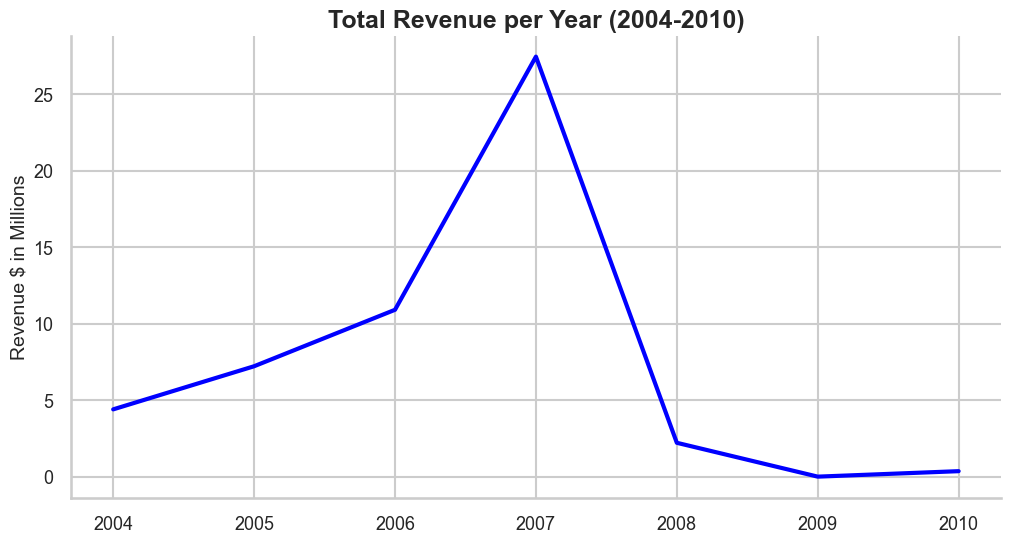

In [115]:
# Plot the revenue data
sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Plot line chart
plt.plot(revenue_per_year_adj['revenue$inM'], color='blue', linewidth=3)

# Add titles and labels
plt.title("Total Revenue per Year (2004-2010)", fontsize=18, fontweight="bold")
plt.ylabel("Revenue $ in Millions", fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Remove top and right borders for a cleaner look
sns.despine()

# Save the chart as an image file
plt.savefig("total_revenue_per_year_in_M_line_chart.png")

# Display the chart
plt.show()


In [116]:
# Calculate Year-over-Year percentage change in revenue
revenue_per_year['YoY_change'] = revenue_per_year['price_revenue$'].pct_change() * 100

# Display the result
revenue_per_year[['price_revenue$', 'YoY_change']]

,price_revenue$,YoY_change
year_sale,,
2004,4397009.80,NaN
2005,7215232.41,64.094072
2006,10906000.58,51.152450
2007,27451798.34,151.712790
2008,2212160.05,-91.941657
2010,357538.20,-83.837598


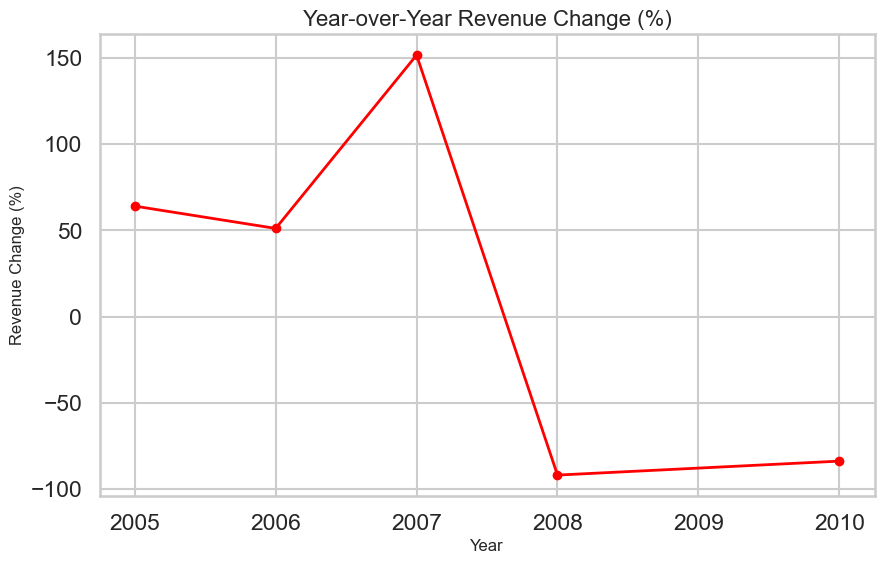

In [117]:
# Plot the Year-over-Year percentage change
plt.figure(figsize=(10, 6))
plt.plot(revenue_per_year.index, revenue_per_year['YoY_change'], marker='o', color='r', linestyle='-', linewidth=2, markersize=6)

# Add titles and labels
plt.title('Year-over-Year Revenue Change (%)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue Change (%)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


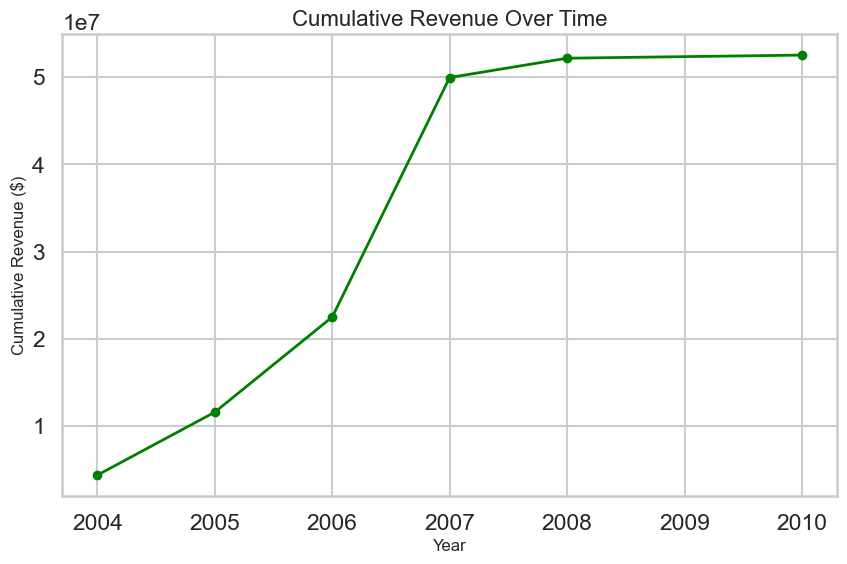

In [118]:
# Calculate cumulative revenue
revenue_per_year['cumulative_revenue'] = revenue_per_year['price_revenue$'].cumsum()

# Plot the Cumulative Revenue
plt.figure(figsize=(10, 6))
plt.plot(revenue_per_year.index, revenue_per_year['cumulative_revenue'], marker='o', color='g', linestyle='-', linewidth=2, markersize=6)

# Add titles and labels
plt.title('Cumulative Revenue Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Cumulative Revenue ($)', fontsize=12)
plt.grid(True)

# Show the plot
plt.show()


### Yearly Sales Distribution Across Buildings (Stacked Area Chart)


In [119]:
# Copy the original data for further preprocessing
stacked_area_data = real_estate_data.copy()

In [120]:
# Create dummy variables for the 'building' column
building_dummies = pd.get_dummies(stacked_area_data['building'])

# Add the dummy variables to the data_stacked_area DataFrame
stacked_area_data = pd.concat([stacked_area_data, building_dummies], axis=1)

# Rename the dummy variables for clarity
stacked_area_data = stacked_area_data.rename(columns={'1': 'building1',
                                                      '2': 'building2',
                                                      '3': 'building3',
                                                      '4': 'building4',
                                                      '5': 'building5'})
stacked_area_data.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,...,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,...,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,...,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,...,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,...,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004,True,False,False,False,False


In [121]:
# Filter out only the sold apartments
stacked_area_data = stacked_area_data[stacked_area_data['sold'] == 1]

# Create a breakdown of the number of sales per year and per building
columns_of_interest = ['year_sale', 'building1', 'building2', 'building3', 'building4', 'building5']
stacked_area = stacked_area_data[columns_of_interest].groupby('year_sale').sum()
stacked_area

,building1,building2,building3,building4,building5
year_sale,,,,,
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2010,0,0,0,0,1


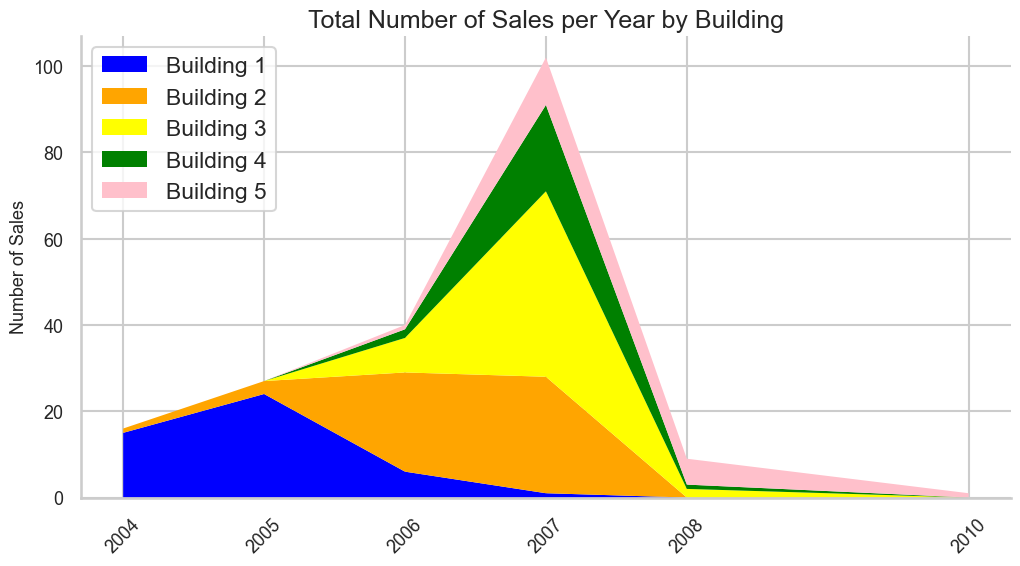

In [122]:
# Define colors for each building
colors = ["blue", "orange", "yellow", 'green', 'pink']
# List of labels for the legend.
# These should appear in the same order as the stacked area plot categories.
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5',]

# Utilize seaborn's 'whitegrid' theme for a cleaner look with a white background.
sns.set_style("whitegrid")

# Initiate a figure that's in line with the dimensions of the other figures.
plt.figure(figsize = (12, 6))

# Create a stacked area plot with our data.
plt.stackplot(stacked_area.index, # The x-axis is simply the index (the year).
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              colors = colors,
              edgecolor = 'none')

# Include x-axis labels for each year and rotate them by 45 degrees for better readability.
plt.xticks(stacked_area.index, rotation = 45) 

# Add a legend and specify its location on the chart.
plt.legend(labels = labels, loc = "upper left") 

# Label the y-axis and format the x and y tick marks for improved readability.
plt.ylabel("Number of Sales", fontsize = 13)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

# Provide a clear title for the chart.
plt.title("Total Number of Sales per Year by Building", fontsize = 18)

# Remove top and right borders of the chart for a cleaner look.
sns.despine()

# Save your chart as an image for external use.
plt.savefig("total_sales_per_year_per_building_stacked_area_chart.png")

# Display the plot.
plt.show()

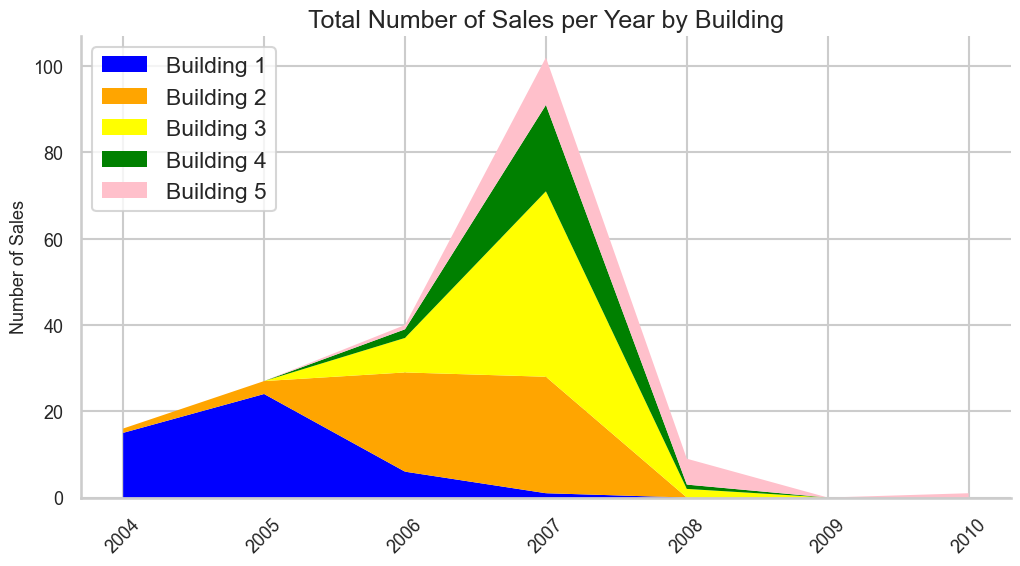

In [123]:
# Append a row for 2009 with 0 values for all buildings
stacked_area_adj = stacked_area.copy()

# Append the row for 2009
stacked_area_adj.loc[2009] = [0, 0, 0, 0, 0]

# Reorder the index to include 2009, and make sure the years are in order
stacked_area_adj = stacked_area_adj.loc[sorted(stacked_area_adj.index)]

# Define colors for each building
colors = ["blue", "orange", "yellow", 'green', 'pink']

# Labels for the legend
labels = ['Building 1', 'Building 2', 'Building 3', 'Building 4', 'Building 5']

# Use seaborn's 'whitegrid' style for a clean background
sns.set_style("whitegrid")

# Create a figure with a size of (12, 6)
plt.figure(figsize=(12, 6))

# Generate the stacked area plot
plt.stackplot(stacked_area_adj.index, 
              stacked_area_adj['building1'],
              stacked_area_adj['building2'],
              stacked_area_adj['building3'],
              stacked_area_adj['building4'],
              stacked_area_adj['building5'],
              colors=colors,
              edgecolor='none')

# Rotate x-axis labels for better readability
plt.xticks(stacked_area_adj.index, rotation=45)

# Add the legend
plt.legend(labels=labels, loc="upper left")

# Set the y-axis label and font sizes for the axes
plt.ylabel("Number of Sales", fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Add the title to the chart
plt.title("Total Number of Sales per Year by Building", fontsize=18)

# Remove the top and right borders of the chart
sns.despine()

# Save the chart as a .png file
plt.savefig("total_sales_per_year_per_building_stacked_area_chart_with_2009.png")

# Display the plot
plt.show()


In [124]:
real_estate_data.columns.array

<NumpyExtensionArray>
[            'property_id',                'building',
               'date_sale',                    'type',
               'property#',                    'area',
                    'sold',             'customer_id',
                  'price$',       'date_sale_missing',
      'customerid_missing',             'sale_status',
              'individual',              'birth_date',
                     'sex',                 'country',
                   'state',                 'purpose',
       'deal_satisfaction',                'mortgage',
                  'source',               'full_name',
         'age_at_purchase', 'age_at_purchase_rounded',
            'age_interval',          'price_interval',
               'year_sale']
Length: 27, dtype: object

In [125]:
real_estate_data.head()

,property_id,building,date_sale,type,property#,area,sold,customer_id,price$,date_sale_missing,...,purpose,deal_satisfaction,mortgage,source,full_name,age_at_purchase,age_at_purchase_rounded,age_interval,price_interval,year_sale
0,1030,1,2005-11-01,apartment,30,743.09,1,C0028,246172.68,False,...,home,5.0,0.0,website,Madalyn Mercer,19.378082,19.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
1,1029,1,2005-10-01,apartment,29,756.21,1,C0027,246331.90,False,...,home,5.0,0.0,website,Lara Carrillo,22.616438,22.0,"(19.0, 25.0]","(243776.371, 285847.138]",2005
2,2002,2,2007-07-01,apartment,2,587.28,1,C0112,209280.91,False,...,home,1.0,1.0,client,Donavan Flowers,21.523288,21.0,"(19.0, 25.0]","(201705.604, 243776.371]",2007
3,2031,2,2007-12-01,apartment,31,1604.75,1,C0160,452667.01,False,...,investment,3.0,1.0,website,Darien Dorsey,21.942466,21.0,"(19.0, 25.0]","(412059.439, 454130.206]",2007
4,1049,1,2004-11-01,apartment,49,1375.45,1,C0014,467083.31,False,...,home,4.0,0.0,agency,Alessandra Perry,25.484932,25.0,"(25.0, 31.0]","(454130.206, 496200.973]",2004


### Property Price vs Buyer Age for Different Price Ranges

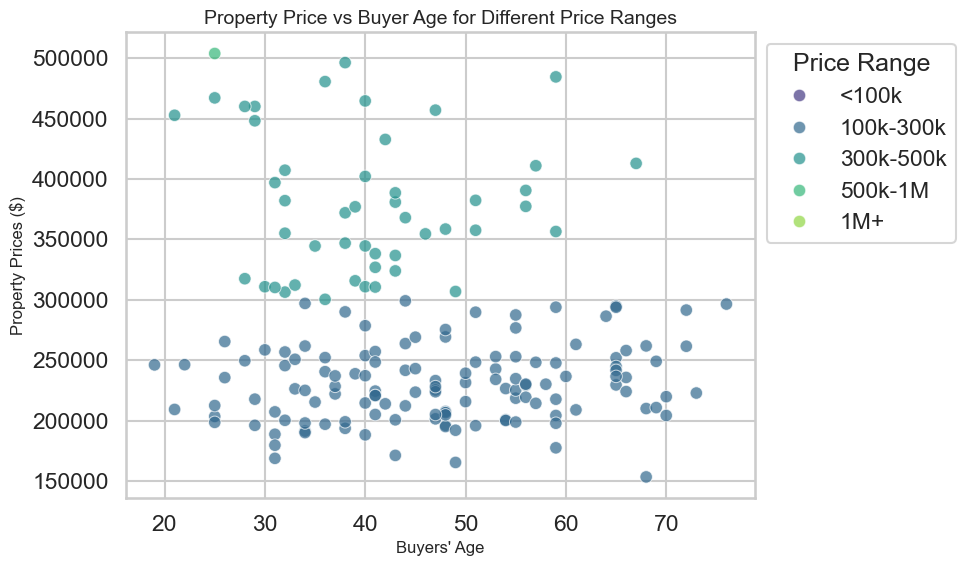

In [126]:
# Define the bins and labels for the price range
bins = [0, 100000, 300000, 500000, 1000000, 5000000]
labels = ['<100k', '100k-300k', '300k-500k', '500k-1M', '1M+']

# Create the 'price_range' column based on the 'price$' values
real_estate_data['price_range'] = pd.cut(real_estate_data['price$'], bins=bins, labels=labels, right=False)

# Scatterplot showing the relationship between age and property prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_at_purchase_rounded', y='price$', data=real_estate_data, hue='price_range', palette='viridis', alpha=0.7)

# Title and labels
plt.title('Property Price vs Buyer Age for Different Price Ranges', fontsize=14)
plt.xlabel('Buyers\' Age', fontsize=12)
plt.ylabel('Property Prices ($)', fontsize=12)

# Legend settings
plt.legend(title='Price Range', bbox_to_anchor=(1, 1), loc='upper left')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


### Sales Trends Over Time

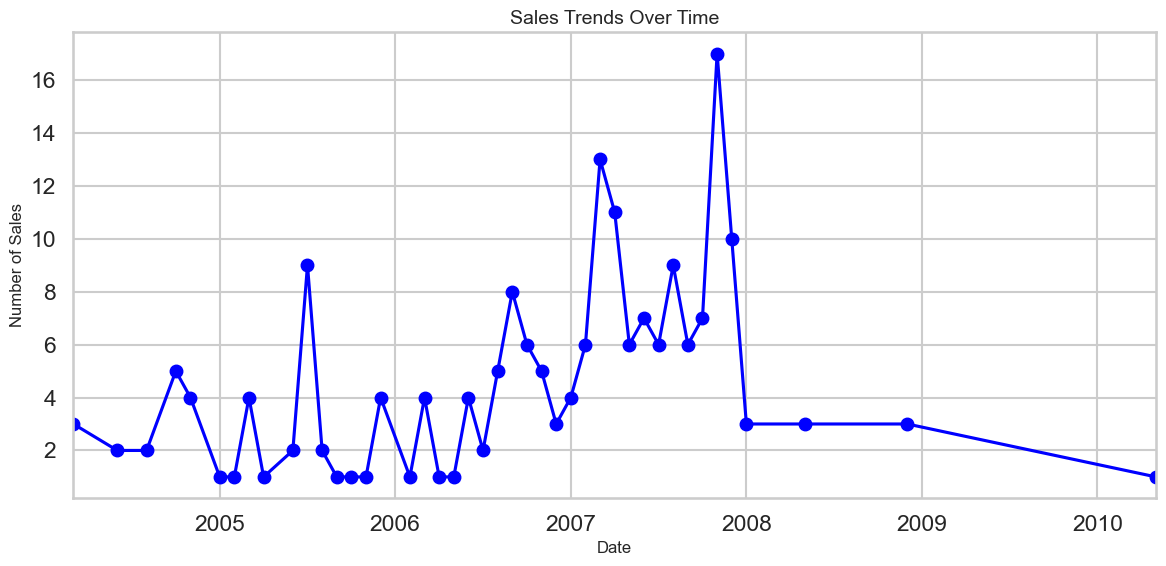

In [127]:
# Adding a new column for year and month of sale
real_estate_data['date_sale'] = pd.to_datetime(real_estate_data['date_sale'])
real_estate_data['year_month'] = real_estate_data['date_sale'].dt.to_period('M')

# Line plot showing sales trends over time
sales_over_time = real_estate_data['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', marker='o', color='blue')
plt.title('Sales Trends Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)
plt.tight_layout()
plt.show()

### Bar plot showing average property prices by state

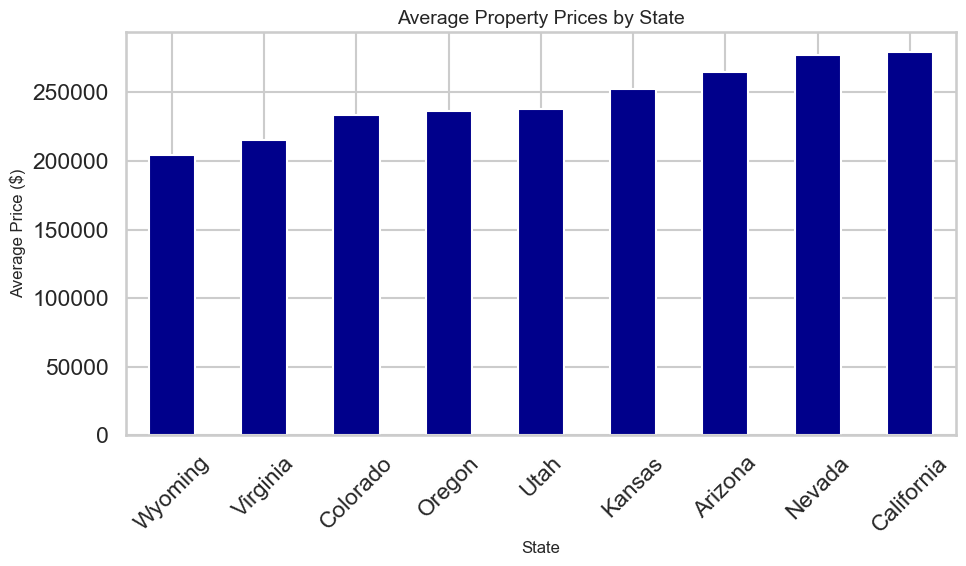

In [128]:
# Bar plot showing average property prices by state
avg_price_by_state = real_estate_data.groupby('state')['price$'].mean()

plt.figure(figsize=(10, 6))
avg_price_by_state.sort_values().plot(kind='bar', color='darkblue')
plt.title('Average Property Prices by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Bar plot showing average price by price range

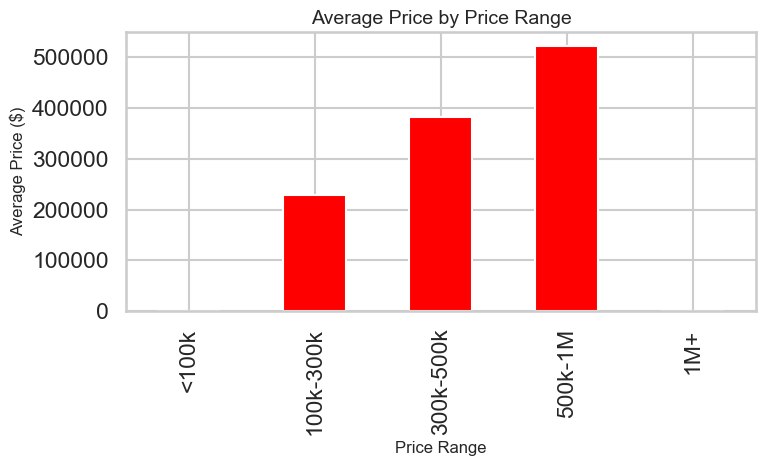

In [129]:
# Bar plot showing average price by price range
avg_price_by_range = real_estate_data.groupby('price_range')['price$'].mean()

plt.figure(figsize=(8, 5))
avg_price_by_range.plot(kind='bar', color='red')
plt.title('Average Price by Price Range', fontsize=14)
plt.xlabel('Price Range', fontsize=12)
plt.ylabel('Average Price ($)', fontsize=12)  
plt.tight_layout()
plt.show()

### Histogram of price distribution

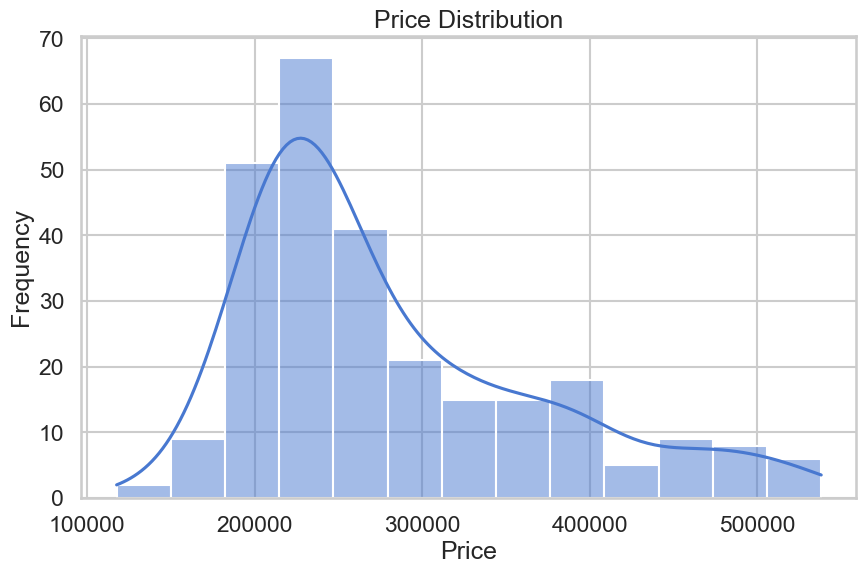

In [130]:
# Histogram of price distribution
plt.figure(figsize=(10, 6))
sns.histplot(real_estate_data['price$'], kde=True)  # Use the correct column name for price
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

### Bar plot of average price by country and by state


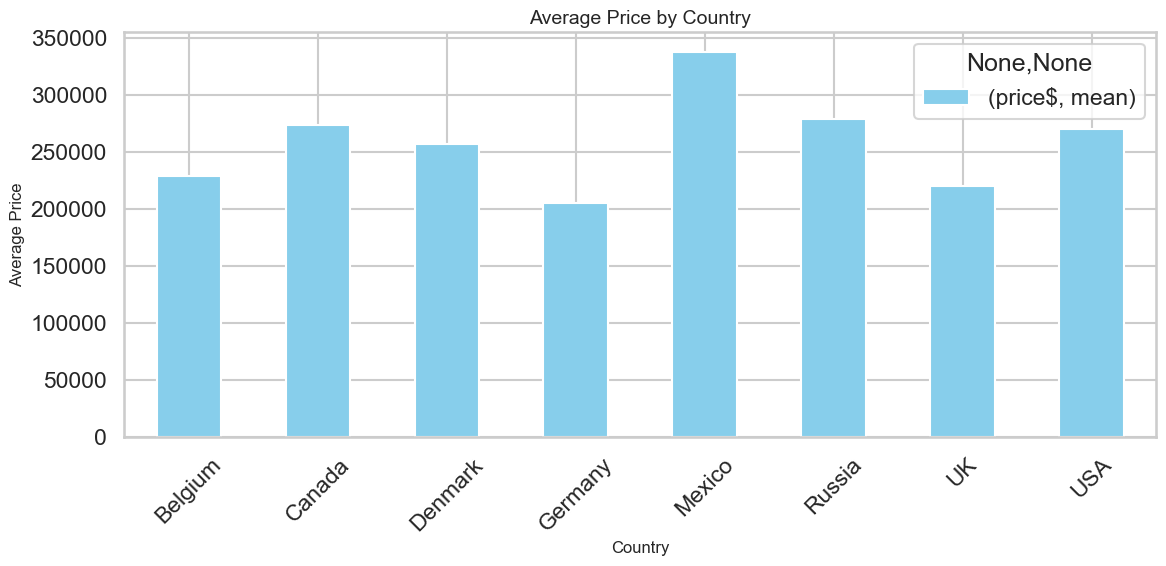

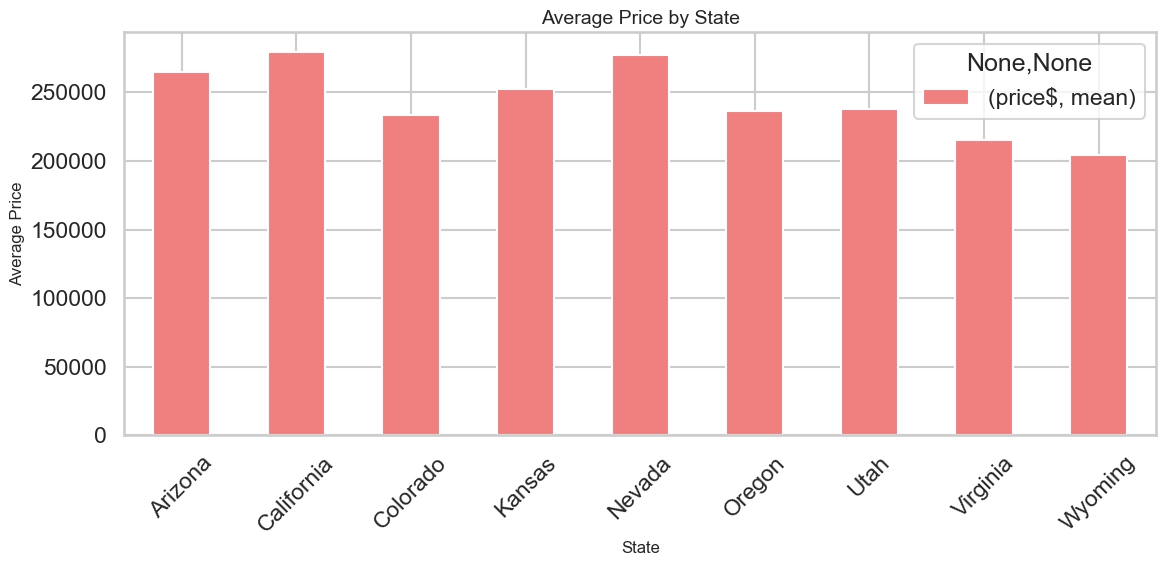

In [131]:
# Plotting Performance by Country
plt.figure(figsize=(12, 6))

# Plot mean price by country
country_performance.plot(kind='bar', x='country', y=('price$', 'mean'), color='skyblue', ax=plt.gca())
plt.title('Average Price by Country', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting Performance by State
plt.figure(figsize=(12, 6))

# Plot mean price by state
state_performance.plot(kind='bar', x='state', y=('price$', 'mean'), color='lightcoral', ax=plt.gca())
plt.title('Average Price by State', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Average Price', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Visualizing Property Prices by Age Group

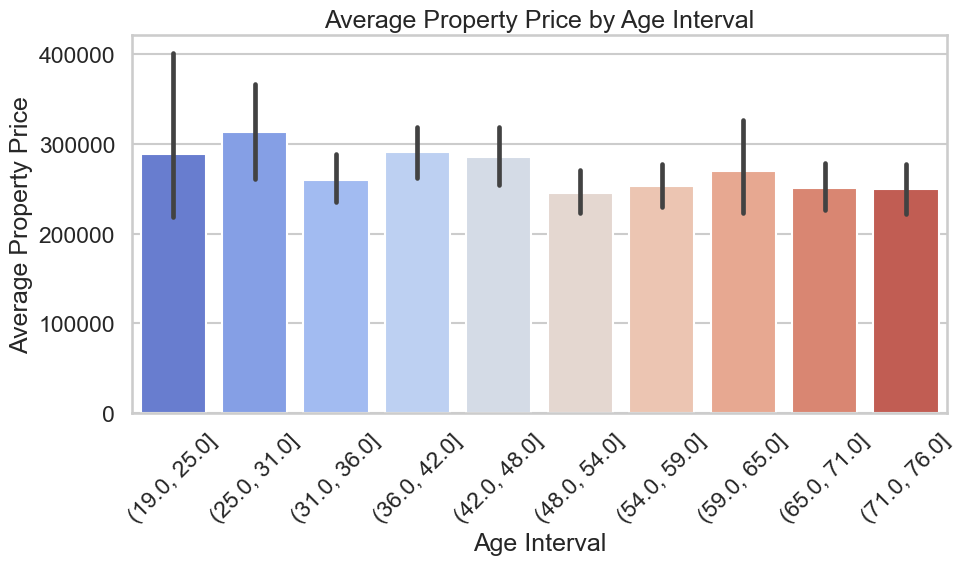

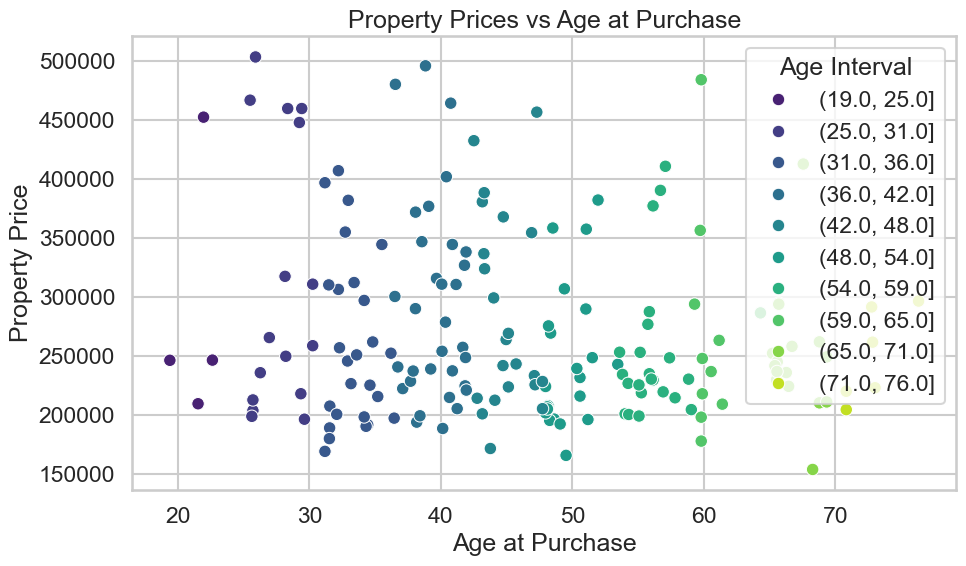

In [132]:
# Bar plot showing average property prices by age interval
plt.figure(figsize=(10, 6))
sns.barplot(x='age_interval', y='price$', data=real_estate_data, palette='coolwarm')
plt.title('Average Property Price by Age Interval')
plt.xlabel('Age Interval')
plt.ylabel('Average Property Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Scatter plot showing relationship between age at purchase and property prices
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age_at_purchase', y='price$', data=real_estate_data, hue='age_interval', palette='viridis')
plt.title('Property Prices vs Age at Purchase')
plt.xlabel('Age at Purchase')
plt.ylabel('Property Price')
plt.legend(title='Age Interval')
plt.tight_layout()
plt.show()


### Visualizing Average Transaction Satisfaction

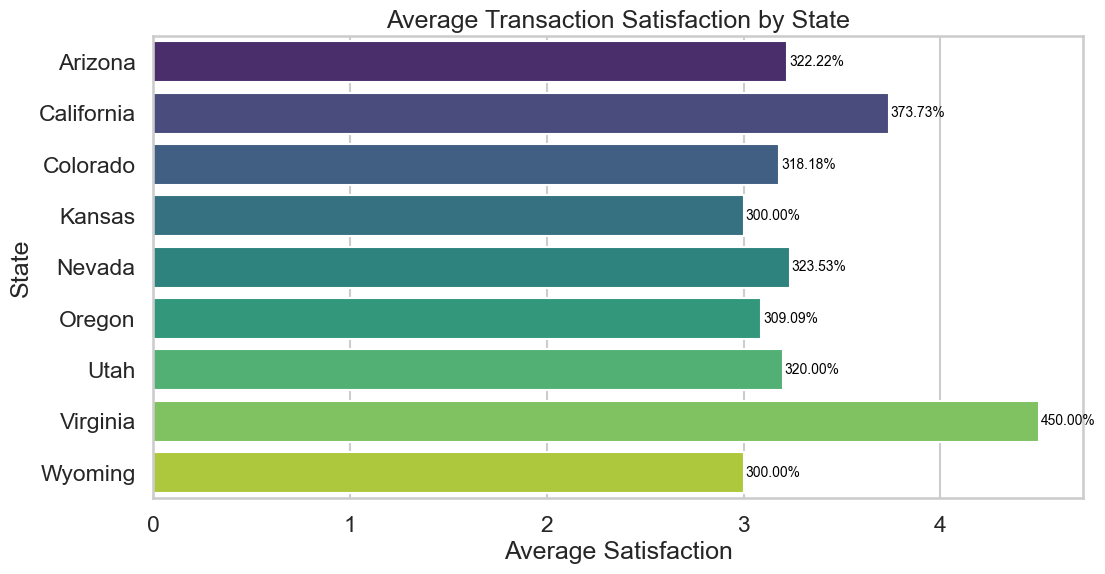

In [133]:
# Average transaction satisfaction by state
state_satisfaction = real_estate_data.groupby('state')['deal_satisfaction'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
ax2 = sns.barplot(x='deal_satisfaction', y='state', data=state_satisfaction, palette='viridis')
plt.title('Average Transaction Satisfaction by State')
plt.xlabel('Average Satisfaction')
plt.ylabel('State')

# Add percentages above the bars
for p in ax2.patches:
    ax2.annotate(f'{p.get_width() * 100:.2f}%',  # Convert to percentage
                 (p.get_width() + 0.01, p.get_y() + p.get_height() / 2), 
                 ha='left', va='center', 
                 fontsize=10, color='black')

plt.show()

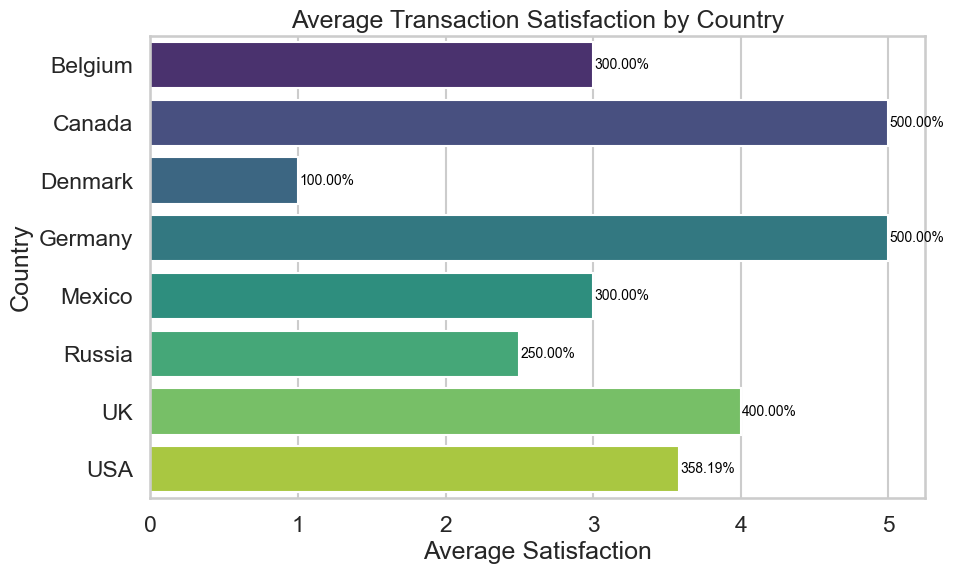

In [134]:
# Average transaction satisfaction by country
country_satisfaction = real_estate_data.groupby('country')['deal_satisfaction'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
ax1 = sns.barplot(x='deal_satisfaction', y='country', data=country_satisfaction, palette='viridis')
plt.title('Average Transaction Satisfaction by Country')
plt.xlabel('Average Satisfaction')
plt.ylabel('Country')

# Add percentages above the bars
for p in ax1.patches:
    ax1.annotate(f'{p.get_width() * 100:.2f}%',  # Convert to percentage
                 (p.get_width() + 0.01, p.get_y() + p.get_height() / 2), 
                 ha='left', va='center', 
                 fontsize=10, color='black')

plt.show()

### Property Type Distribution

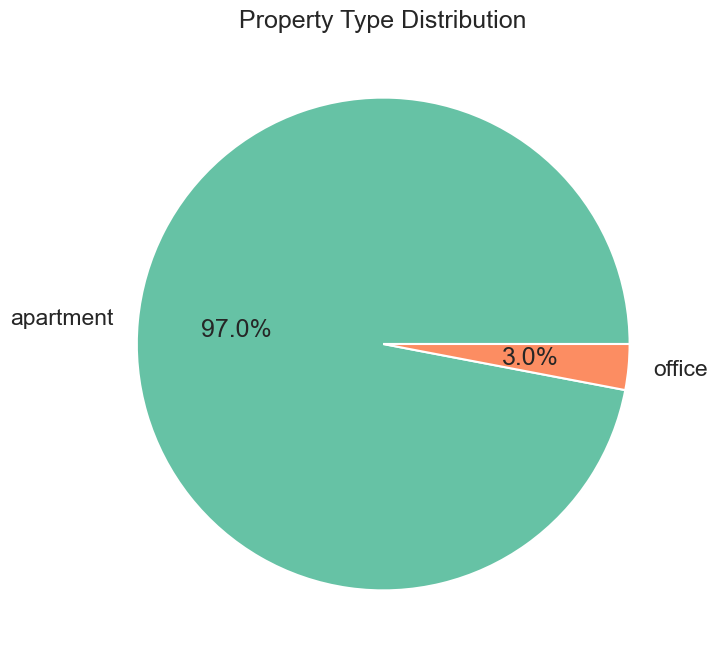

In [135]:
plt.figure(figsize=(8, 8))
real_estate_data['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Set2'))
plt.title('Property Type Distribution')
plt.ylabel('')
plt.show()


### Distribution of Clients by Age

In [136]:
print(real_estate_data['age_interval'].value_counts())


age_interval
(36.0, 42.0]    33
(31.0, 36.0]    26
(42.0, 48.0]    22
(48.0, 54.0]    22
(54.0, 59.0]    22
(25.0, 31.0]    16
(65.0, 71.0]    16
(59.0, 65.0]    11
(71.0, 76.0]     6
(19.0, 25.0]     4
Name: count, dtype: int64


age_interval
36-45    50
26-35    38
46-55    36
56-65    28
66+      22
18-25     4
Name: count, dtype: int64


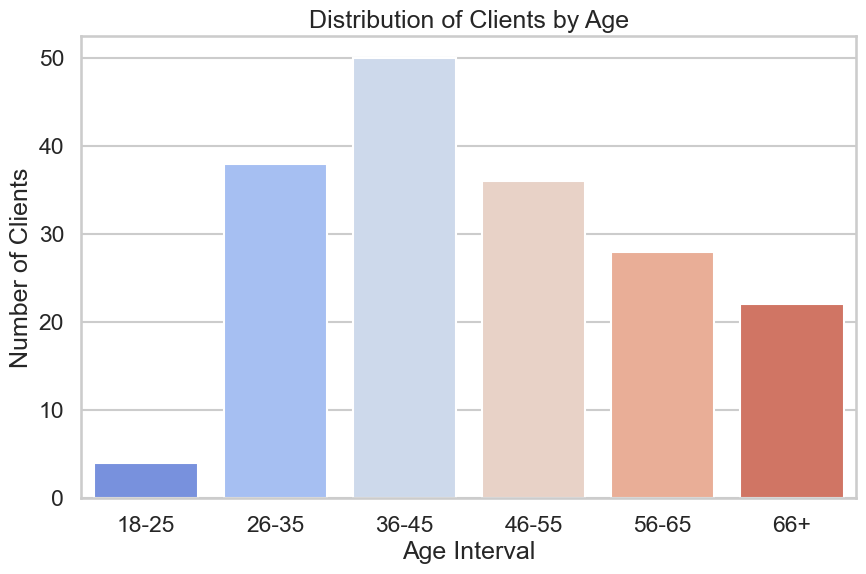

In [137]:
# Define the bins and labels for age intervals
bins = [18, 25, 35, 45, 55, 65, 100]  # Example age intervals
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

# Create the age intervals column based on the age_at_purchase column
real_estate_data['age_interval'] = pd.cut(real_estate_data['age_at_purchase'], bins=bins, labels=labels, right=True)

# Check the distribution of values in the age_interval column
print(real_estate_data['age_interval'].value_counts())

# Visualizing the distribution of clients by age
plt.figure(figsize=(10, 6))
sns.countplot(x='age_interval', data=real_estate_data, palette='coolwarm')
plt.title('Distribution of Clients by Age')
plt.xlabel('Age Interval')
plt.ylabel('Number of Clients')
plt.show()


### Sales Trends Over Time

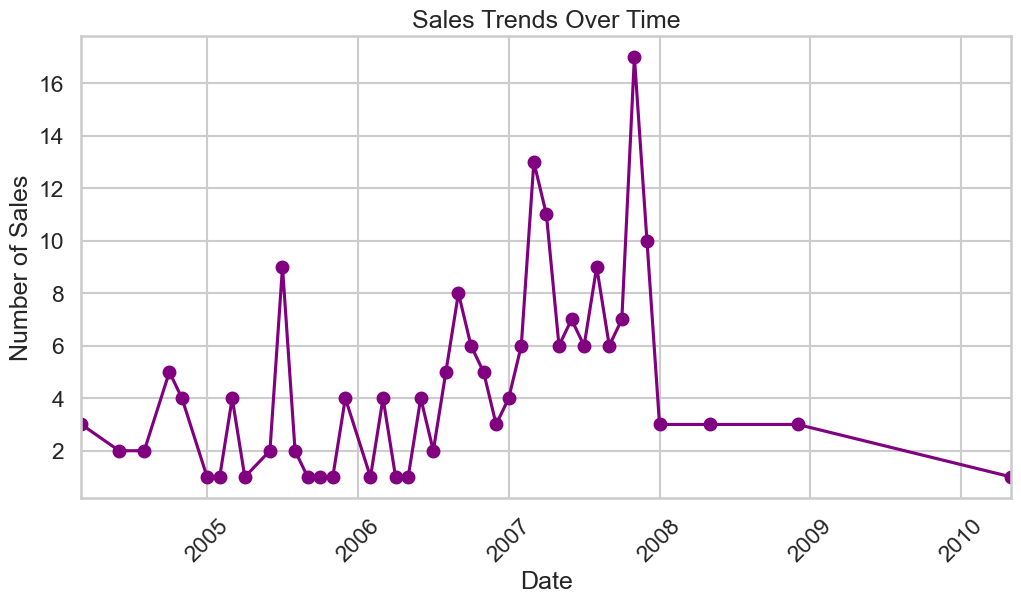

In [138]:
# Ensure 'date_sale' is a datetime column
real_estate_data['date_sale'] = pd.to_datetime(real_estate_data['date_sale'])

# Add a column for Year-Month
real_estate_data['year_month'] = real_estate_data['date_sale'].dt.to_period('M')

# Count the number of sales by year-month
sales_over_time = real_estate_data['year_month'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


### Comparison between number apartments and  offices sold

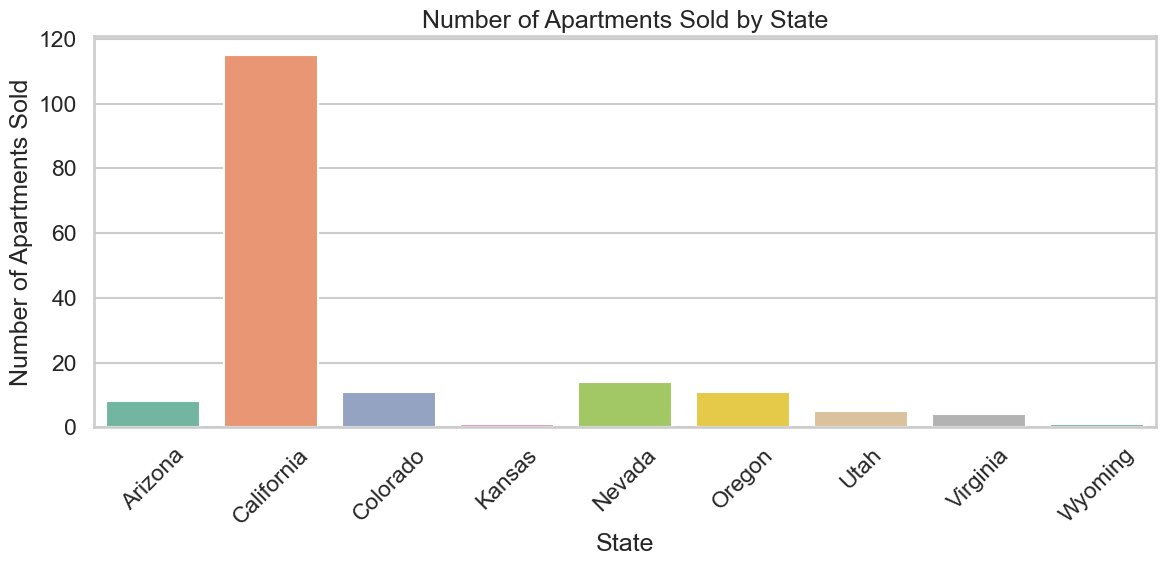

In [139]:
# Calculate the number of apartments sold in each state, ensuring case-sensitivity
state_sales_count = real_estate_data.groupby('state')['type'].apply(lambda x: (x.str.lower() == 'apartment').sum()).reset_index()

# Visualize the number of apartments sold by state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='type', data=state_sales_count, palette='Set2')
plt.title('Number of Apartments Sold by State')
plt.xlabel('State')
plt.ylabel('Number of Apartments Sold')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.show()

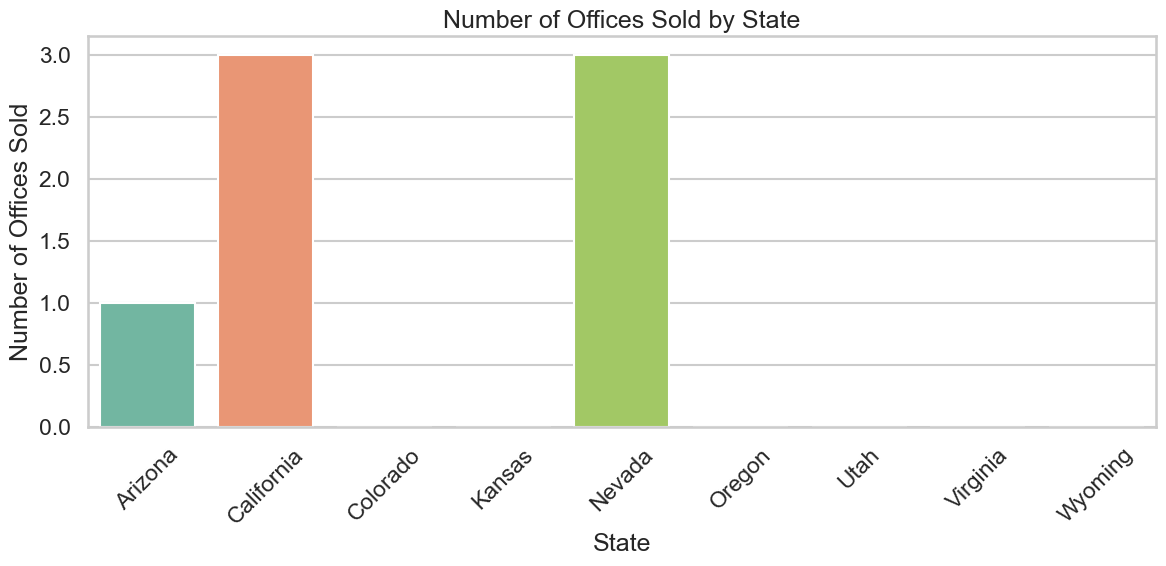

In [140]:
# Calculate the number of offices sold in each state, ensuring case-sensitivity
state_sales_count = real_estate_data.groupby('state')['type'].apply(lambda x: (x.str.lower() == 'office').sum()).reset_index()

# Visualize the number of offices sold by state
plt.figure(figsize=(12, 6))
sns.barplot(x='state', y='type', data=state_sales_count, palette='Set2')
plt.title('Number of Offices Sold by State')
plt.xlabel('State')
plt.ylabel('Number of Offices Sold')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()


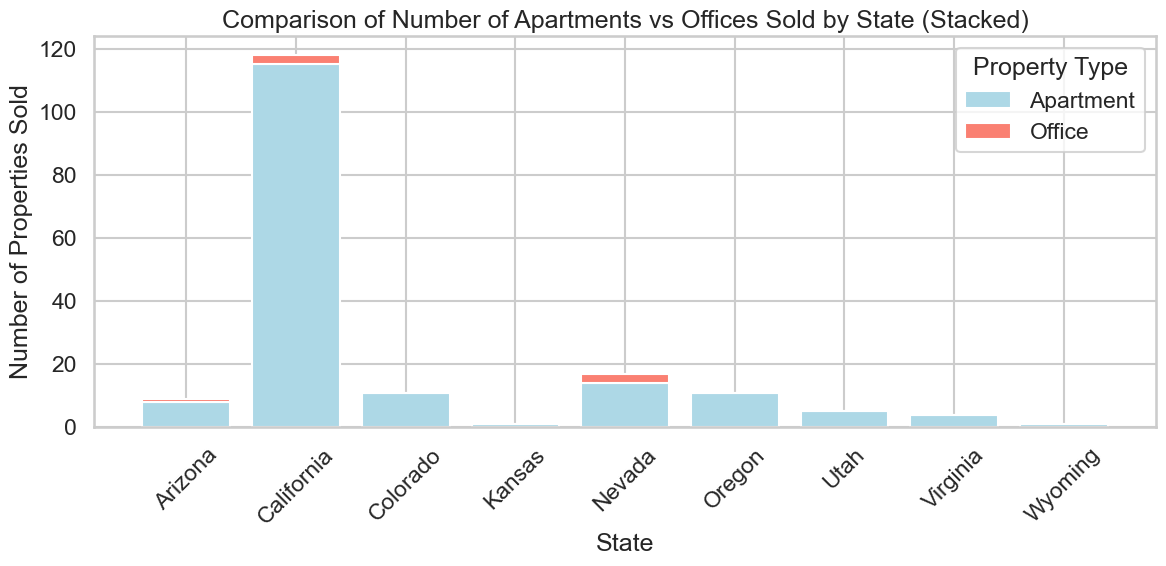

In [141]:
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the number of apartments sold in each state (case-insensitive)
apartment_sales_count = real_estate_data.groupby('state')['type'].apply(lambda x: (x.str.lower() == 'apartment').sum()).reset_index()
apartment_sales_count.rename(columns={'type': 'type_Apartment'}, inplace=True)  # Rename for clarity

# Calculate the number of offices sold in each state (case-insensitive)
office_sales_count = real_estate_data.groupby('state')['type'].apply(lambda x: (x.str.lower() == 'office').sum()).reset_index()
office_sales_count.rename(columns={'type': 'type_Office'}, inplace=True)  # Rename for clarity

# Merge the two dataframes on 'state'
sales_count = pd.merge(apartment_sales_count, office_sales_count, on='state', how='outer')

# Plotting the comparison as a stacked bar chart
plt.figure(figsize=(12, 6))

# Plot apartments and offices
plt.bar(sales_count['state'], sales_count['type_Apartment'], label='Apartment', color='lightblue')
plt.bar(sales_count['state'], sales_count['type_Office'], bottom=sales_count['type_Apartment'], label='Office', color='salmon')

# Titles and labels
plt.title('Comparison of Number of Apartments vs Offices Sold by State (Stacked)')
plt.xlabel('State')
plt.ylabel('Number of Properties Sold')
plt.xticks(rotation=45)
plt.legend(title='Property Type')

plt.tight_layout()  
plt.show()


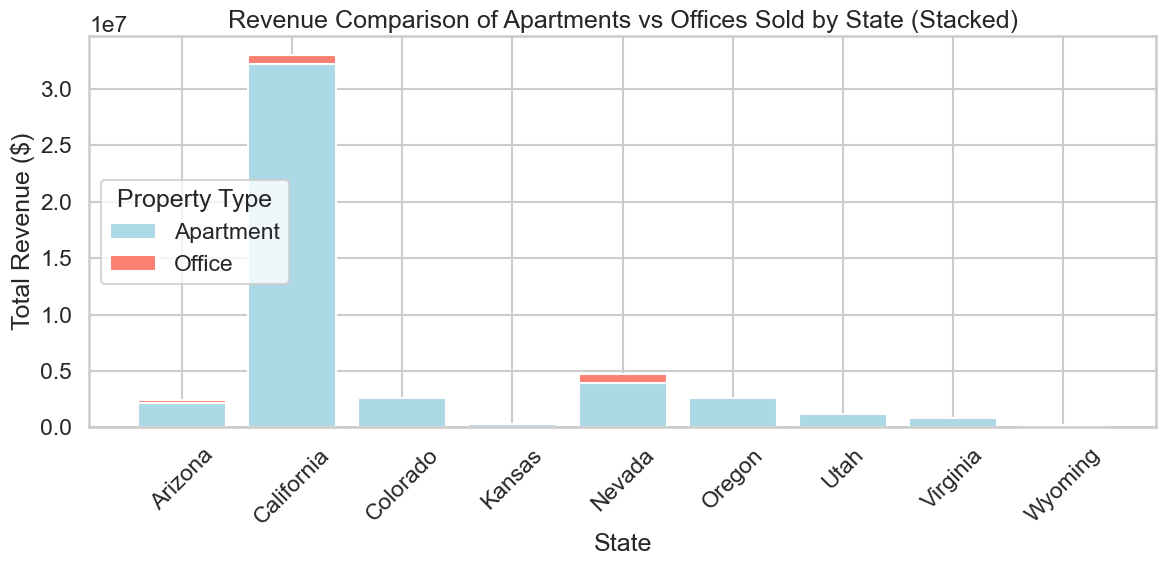

In [142]:
# Ensure that 'price$' is numeric
real_estate_data['price$'] = pd.to_numeric(real_estate_data['price$'], errors='coerce')

# Calculate total revenue from apartments sold in each state (case-insensitive)
apartment_revenue = real_estate_data[real_estate_data['type'].str.lower() == 'apartment'] \
    .groupby('state')['price$'].sum().reset_index()
apartment_revenue.rename(columns={'price$': 'revenue_Apartment'}, inplace=True)

# Calculate total revenue from offices sold in each state (case-insensitive)
office_revenue = real_estate_data[real_estate_data['type'].str.lower() == 'office'] \
    .groupby('state')['price$'].sum().reset_index()
office_revenue.rename(columns={'price$': 'revenue_Office'}, inplace=True)

# Merge the two revenue dataframes on 'state'
revenue_comparison = pd.merge(apartment_revenue, office_revenue, on='state', how='outer')

# Plotting the comparison of revenue between apartments and offices
plt.figure(figsize=(12, 6))

# Plot apartment revenue
plt.bar(revenue_comparison['state'], revenue_comparison['revenue_Apartment'], label='Apartment', color='lightblue')

# Plot office revenue on top of apartment revenue
plt.bar(revenue_comparison['state'], revenue_comparison['revenue_Office'], bottom=revenue_comparison['revenue_Apartment'], label='Office', color='salmon')

# Titles and labels
plt.title('Revenue Comparison of Apartments vs Offices Sold by State (Stacked)')
plt.xlabel('State')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.legend(title='Property Type')

plt.tight_layout()  # Ensure the labels fit
plt.show()


<Figure size 1200x800 with 0 Axes>

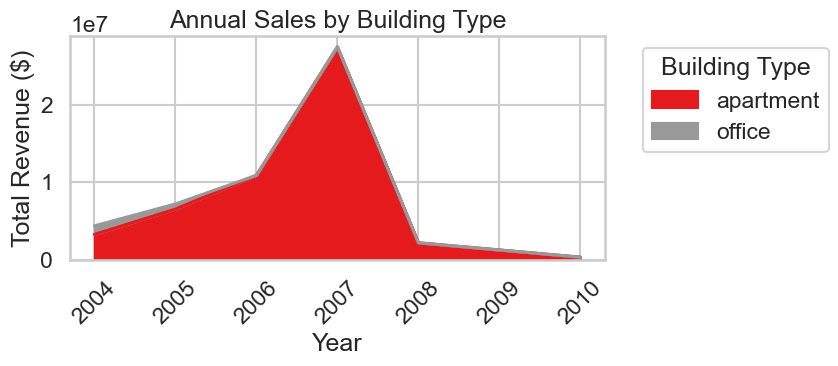

In [143]:
# Ensure the 'date_sale' is in datetime format
real_estate_data['date_sale'] = pd.to_datetime(real_estate_data['date_sale'])

# Extract the year from the 'date_sale' column
real_estate_data['year'] = real_estate_data['date_sale'].dt.year

# Calculate the annual sales by building type
annual_sales_by_building = real_estate_data.groupby(['year', 'type'])['price$'].sum().reset_index()

# Create a pivot table with 'year' as the index and 'type' as columns
sales_pivot = annual_sales_by_building.pivot(index='year', columns='type', values='price$')

# Plot the annual sales by building type using a stacked area chart
plt.figure(figsize=(12, 8))
sales_pivot.plot(kind='area', stacked=True, figsize=(9, 4), cmap='Set1')

# Titles and labels
plt.title('Annual Sales by Building Type')
plt.xlabel('Year')
plt.ylabel('Total Revenue ($)')
plt.legend(title='Building Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Final Test Q?A

In [144]:
# Question 2: What is the average area of building type 1 in the data set in squared feet?
# Check the unique values in the 'building' column to confirm the building types
# This helps us identify if '1' is a valid building type in the dataset
print(real_estate_data['building'].unique())

# Filter the data for building type '1'
building_1_data = real_estate_data[real_estate_data['building'] == '1']

# Calculate the average area for building type '1'
average_area_building_1 = building_1_data['area'].mean()

# Display the result
if not building_1_data.empty:
    print(f"Average area of Building 1: {average_area_building_1:.2f} sq. ft.")
else:
    print("Building type 1 does not exist in the dataset.")


['1' '2' '3' '4' '5']
Average area of Building 1: 928.04 sq. ft.


In [145]:
# Question 3: What is the most common property type sold?
# The 'mode()' function returns the most frequent value(s) in a column.
most_common_property_type = real_estate_data['type'].mode()[0]

# Print the result: the most common property type found in the 'type' column.
print(f"Most common property type: {most_common_property_type}")

Most common property type: apartment


In [146]:
# Question 4: Which building has the highest average property price?
# Group the data by 'type' (building) and calculate the mean property price for each building type.
avg_price_per_building = real_estate_data.groupby('type')['price$'].mean()

# Find the building with the highest average property price using idxmax() to get the index (building type).
highest_avg_price_building = avg_price_per_building.idxmax()

# Print the result: the building type with the highest average property price.
print(f"Building with highest average price: {highest_avg_price_building}")

Building with highest average price: apartment


In [147]:
# Question 5: What is the average cost of a building in Mexico?
# Filter the data for buildings located in Mexico and calculate the mean of the 'price$' column.
avg_price_mexico = real_estate_data[real_estate_data['country'] == 'Mexico']['price$'].mean()

# Print the result: the average price of a building in Mexico.
print(f"Average cost of a building in Mexico: {avg_price_mexico:,.2f}.")

Average cost of a building in Mexico: 338,181.18.


In [148]:
# Question 6: Based on the data, which state has the second-highest number of properties sold?
# Count the number of properties sold in each state by using the value_counts() function.
state_sales_count = real_estate_data['state'].value_counts()

# Get the second-highest state by accessing the second index in the value_counts series.
second_highest_state = state_sales_count.index[1]  # second-highest state

# Print the result: the state with the second-highest number of properties sold.
print(f"Second-highest number of properties sold in: {second_highest_state}")

Second-highest number of properties sold in: Nevada


In [149]:
# Question 7: Based on the customer demographics, what is the most common age range of property buyers?

# Ensure the 'age_range' column exists and is not empty
if 'age_range' in real_estate_data.columns and not real_estate_data['age_range'].isnull().all():
    # Use mode() to find the most frequent value in the 'age_range' column
    most_common_age_range = real_estate_data['age_range'].mode()[0]

    # Print the result: the most common age range of property buyers
    print(f"The most common age range of property buyers is: {most_common_age_range}")
else:
    print("The 'age_range' column does not exist or contains no data.")

The 'age_range' column does not exist or contains no data.


In [150]:
real_estate_data.columns

Index(['property_id', 'building', 'date_sale', 'type', 'property#', 'area',
       'sold', 'customer_id', 'price$', 'date_sale_missing',
       'customerid_missing', 'sale_status', 'individual', 'birth_date', 'sex',
       'country', 'state', 'purpose', 'deal_satisfaction', 'mortgage',
       'source', 'full_name', 'age_at_purchase', 'age_at_purchase_rounded',
       'age_interval', 'price_interval', 'year_sale', 'price_range',
       'year_month', 'year'],
      dtype='object')

In [151]:
# Question 8: Considering you have split the price variable into 10 equal intervals,
# how many unsold properties are there in the last interval $496,201–$538,272?
# Divide the 'price$' column into 10 equal intervals
price_intervals = pd.cut(real_estate_data['price$'], bins=10)

# Determine the last interval
last_interval = price_intervals.cat.categories[-1]
print(f"Last interval: {last_interval}")

# Filter for unsold properties in the last interval
unsold_in_last_interval = real_estate_data[(price_intervals == last_interval) & 
                                           (real_estate_data['sold'] == 0)].shape[0]

# Print the result
print(f"Unsold properties in the last interval ({last_interval}): {unsold_in_last_interval}")

Last interval: (496200.973, 538271.74]
Unsold properties in the last interval ((496200.973, 538271.74]): 6


In [152]:
# Question 9: What is the correlation between the customer's age and the property price?
# Calculate the correlation between 'age_at_purchase' and 'price$'
correlation_age_price = real_estate_data['age_at_purchase'].corr(real_estate_data['price$'])

# Print the result
print(f"The correlation between the customer's age and the property price is: {correlation_age_price:.2f}")

The correlation between the customer's age and the property price is: -0.17


In [153]:
# Question 10: Which of the following countries has the highest average deal satisfaction?
# Group the data by 'country' and calculate the average deal satisfaction for each country
average_deal_satisfaction = real_estate_data.groupby('country')['deal_satisfaction'].mean()

# Find the country with the highest average deal satisfaction
highest_avg_satisfaction_country = average_deal_satisfaction.idxmax()
highest_avg_satisfaction_value = average_deal_satisfaction.max()

# Print the result
print(f"The country with the highest average deal satisfaction is: {highest_avg_satisfaction_country} with an average satisfaction score of {highest_avg_satisfaction_value:.2f}")

The country with the highest average deal satisfaction is: Canada with an average satisfaction score of 5.00


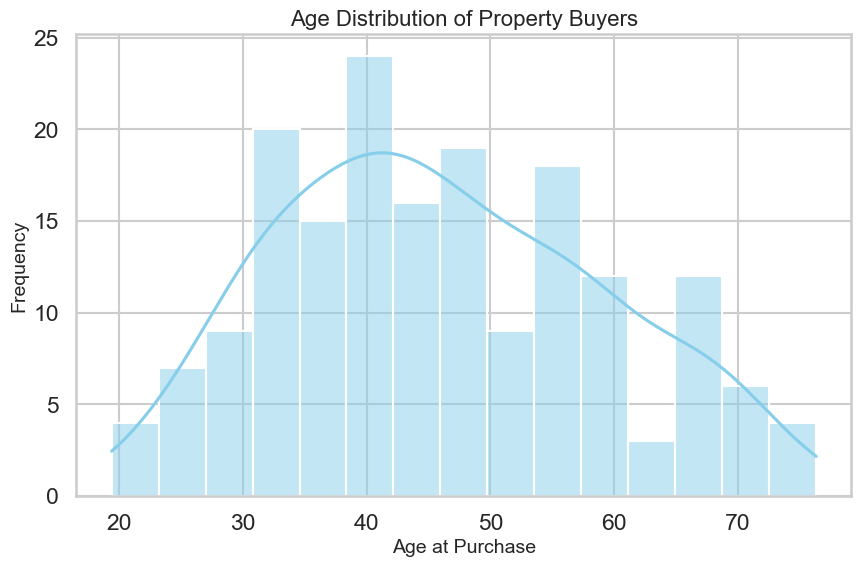

In [154]:
# Question 11: Looking at the histogram of age distribution, what can you infer about the shape of the distribution?
# Create a histogram for the 'age_at_purchase' column
plt.figure(figsize=(10, 6))
sns.histplot(real_estate_data['age_at_purchase'], bins=15, kde=True, color='skyblue')

# Add labels and title
plt.title('Age Distribution of Property Buyers', fontsize=16)
plt.xlabel('Age at Purchase', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Show the plot
plt.show()

In [155]:
# Question 12: Which building had the highest sales in 2004 according to the data?
# Filter the data for the year 2004
sales_2004 = real_estate_data[real_estate_data['year_sale'] == 2004]

# Group the data by 'building' and count the number of sales for each building
sales_by_building_2004 = sales_2004['building'].value_counts()

# Find the building with the highest sales in 2004
highest_sales_building_2004 = sales_by_building_2004.idxmax()
highest_sales_count = sales_by_building_2004.max()

# Display the result
print(f"Building with the highest sales in 2004: {highest_sales_building_2004} ({highest_sales_count} sales)")

Building with the highest sales in 2004: 1 (15 sales)


In [156]:
# Question 13:  Which building is with the highest average price 
# Group the data by 'building' and calculate the mean price for each building type
avg_price_per_building = real_estate_data.groupby('building')['price$'].mean()

# Display the average prices for all buildings
print("Average price per building:")
print(avg_price_per_building)

# Find the building with the highest average price
highest_avg_price_building = avg_price_per_building.idxmax()
highest_avg_price = avg_price_per_building.max()

# Display the result
print(f"\nThe building with the highest average property price is {highest_avg_price_building} with an average price of ${highest_avg_price:,.2f}.")

Average price per building:
building
1    275143.242500
2    286661.848246
3    280451.255556
4    290239.515581
5    274557.604615
Name: price$, dtype: float64

The building with the highest average property price is 4 with an average price of $290,239.52.


In [157]:
# Question 14: Which of the following states account for 82% of the company revenue?in terms of cumulative percentage
state_revenue = real_estate_data.groupby('state')['price$'].sum()
revenue_cumulative = state_revenue.cumsum() / state_revenue.sum()
states_82_revenue = revenue_cumulative[revenue_cumulative <= 0.82].index
print(f"States accounting for 82% of revenue: {', '.join(states_82_revenue)}")


States accounting for 82% of revenue: Arizona, California, Colorado, Kansas


In [158]:
# Question 14: Which of the following states account for 82% of the company revenue?in terms of revenue sum
# Calculate the total revenue (sum of 'price$' column)
total_revenue = real_estate_data['price$'].sum()

# Group the data by 'state' and calculate the sum of revenue for each state
state_revenue = real_estate_data.groupby('state')['price$'].sum()

# Sort the states by revenue in descending order
state_revenue_sorted = state_revenue.sort_values(ascending=False)

# Calculate the cumulative revenue
cumulative_revenue = state_revenue_sorted.cumsum()

# Find the threshold for 82% of the total revenue
threshold = 0.82 * total_revenue

# Find the states that cumulatively contribute to 82% of the revenue
states_82_percent = state_revenue_sorted[cumulative_revenue <= threshold]

# Display the states that account for 82% of the revenue
print(f"States that account for 82% of the revenue:")
print(states_82_percent)

States that account for 82% of the revenue:
state
California    33022648.19
Nevada         4720038.60
Oregon         2602526.55
Colorado       2570287.08
Arizona        2385712.95
Utah           1188776.40
Virginia        860576.75
Kansas          252185.99
Wyoming         204286.67
Name: price$, dtype: float64


In [159]:
# Question 15: Which of the following years brought in the highest revenue?
# Group the data by 'year' and calculate the sum of revenue for each year
year_revenue = real_estate_data.groupby('year')['price$'].sum()

# Find the year with the highest revenue
highest_revenue_year = year_revenue.idxmax()

# Get the highest revenue value
highest_revenue_value = year_revenue.max()

# Display the result
print(f"The year with the highest revenue is {highest_revenue_year} with a total revenue of ${highest_revenue_value:.2f}.")

The year with the highest revenue is 2007.0 with a total revenue of $27451798.34.


In [160]:
# Question 16: Which is the average price of a property in Mexico?
# Filter for properties in Mexico
mexico_properties = real_estate_data[real_estate_data['country'] == 'Mexico']

# Calculate the average price for properties in Mexico
average_price_mexico = mexico_properties['price$'].mean()

# Print the result
print(f"The average price of a property in Mexico is ${average_price_mexico:,.2f}.")

The average price of a property in Mexico is $338,181.18.


year_sale  2004  2005  2006  2007  2008  2010
building                                     
1            15    24     6     1     0     0
2             1     3    23    27     0     0
3             0     0     8    43     2     0
4             0     0     2    20     1     0
5             0     0     1    11     6     1


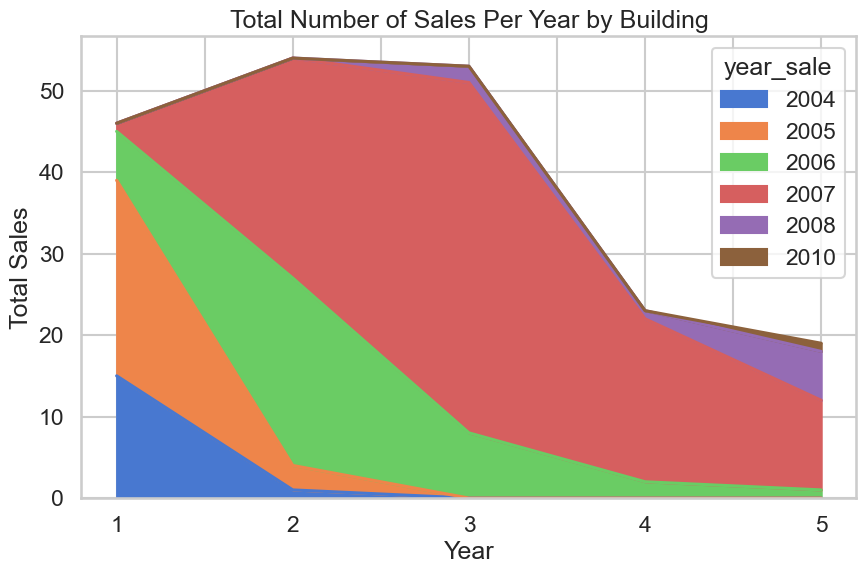

In [161]:
# Question 16: Referring to the stacked area chart showing the total number of sales per year by building, which building showed a significant decrease in sales over the years?
# Group by 'building' and 'year_sale' to calculate total sales per year for each building
sales_per_building_year = real_estate_data.groupby(['building', 'year_sale']).size().unstack(fill_value=0)
print(sales_per_building_year)
# Plot the stacked area chart
sales_per_building_year.plot(kind='area', stacked=True, figsize=(10, 6))

# Set chart labels and title
plt.title('Total Number of Sales Per Year by Building')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Show the plot
plt.show()